-------------------------------------------------

Name : Kaustubh Shingana
Roll No : E21008


In [215]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.express as px
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics
from statsmodels.tsa.arima.model import ARIMA
import warnings 
warnings.filterwarnings("ignore") 
import statsmodels.api as sm
import datetime as dt
import sys
import arch.data.sp500
import numpy as np
import pandas as pd
from arch import arch_model
import math as m
from statsmodels.tsa.seasonal import seasonal_decompose

## Project Approach :
 - Test for Stationarity
 - Heuristical Methods
 - Set benchmark model as Naive model
 - First order Differencing
 - Simple Smoothning Methods
 - Compute ACF & PACF for lag factors
 - fitting Models :
     - AR
     - MA
     - ARMA
     - Checking if Seasonality is there, if yes then for that Time Frame check SARIMA Model
     - ARIMA
     - ARIMAX
     - Using Information Criteria (AIC & BIC) to choose best model
- VAR Model
- ARCH / GARCH Model

Required df Creation

In [2]:
data_indianmkt = yf.download("^NSEBANK ^DJI  ^VIX  ^BSESN HDFCBANK.NS ", period='max' ,group_by='column')
data_indianmkt.head()

[*********************100%***********************]  5 of 5 completed


Adj Close                                       Close         \
           HDFCBANK.NS ^BSESN ^DJI ^NSEBANK       ^VIX HDFCBANK.NS ^BSESN   
Date                                                                        
1990-01-02         NaN    NaN  NaN      NaN  17.240000         NaN    NaN   
1990-01-03         NaN    NaN  NaN      NaN  18.190001         NaN    NaN   
1990-01-04         NaN    NaN  NaN      NaN  19.219999         NaN    NaN   
1990-01-05         NaN    NaN  NaN      NaN  20.110001         NaN    NaN   
1990-01-08         NaN    NaN  NaN      NaN  20.260000         NaN    NaN   

                                     ...        Open                       \
           ^DJI ^NSEBANK       ^VIX  ... HDFCBANK.NS ^BSESN ^DJI ^NSEBANK   
Date                                 ...                                    
1990-01-02  NaN      NaN  17.240000  ...         NaN    NaN  NaN      NaN   
1990-01-03  NaN      NaN  18.190001  ...         NaN    NaN  NaN      NaN   
1990-01-04  NaN      NaN  19.219999  ...         NaN    NaN  NaN      NaN   
1990-01-05  NaN      NaN  20.110001  ...         NaN    NaN  NaN      NaN   
1990-01-08  NaN      NaN  20.260000  ...         NaN    NaN  NaN      NaN   

                           Volume                            
                 ^VIX HDFCBANK.NS ^BSESN ^DJI ^NSEBANK ^VIX  
Date                                                         
1990-01-02  17.240000         NaN    NaN  NaN      NaN  0.0  
1990-01-03  18.190001         NaN    NaN  NaN      NaN  0.0  
1990-01-04  19.219999         NaN    NaN  NaN      NaN  0.0  
1990-01-05  20.110001         NaN    NaN  NaN      NaN  0.0  
1990-01-08  20.260000         NaN    NaN  NaN      NaN  0.0  

[5 rows x 30 columns]

In [3]:
data_intmkt = yf.download("^NSEBANK ^GSPC ^DJI  ^VIX ^N225 ^HSI ^STI ^BSESN ^FTSE ^RUT HDFCBANK.NS ", period='max',group_by='column')
data_intmkt.head()

[*********************100%***********************]  11 of 11 completed


Adj Close                                                        \
           HDFCBANK.NS ^BSESN ^DJI ^FTSE      ^GSPC ^HSI ^N225 ^NSEBANK ^RUT   
Date                                                                           
1927-12-30         NaN    NaN  NaN   NaN  17.660000  NaN   NaN      NaN  NaN   
1928-01-03         NaN    NaN  NaN   NaN  17.760000  NaN   NaN      NaN  NaN   
1928-01-04         NaN    NaN  NaN   NaN  17.719999  NaN   NaN      NaN  NaN   
1928-01-05         NaN    NaN  NaN   NaN  17.549999  NaN   NaN      NaN  NaN   
1928-01-09         NaN    NaN  NaN   NaN  17.500000  NaN   NaN      NaN  NaN   

                 ... Volume                                                 \
           ^STI  ... ^BSESN ^DJI ^FTSE ^GSPC ^HSI ^N225 ^NSEBANK ^RUT ^STI   
Date             ...                                                         
1927-12-30  NaN  ...    NaN  NaN   NaN   0.0  NaN   NaN      NaN  NaN  NaN   
1928-01-03  NaN  ...    NaN  NaN   NaN   0.0  NaN   NaN      NaN  NaN  NaN   
1928-01-04  NaN  ...    NaN  NaN   NaN   0.0  NaN   NaN      NaN  NaN  NaN   
1928-01-05  NaN  ...    NaN  NaN   NaN   0.0  NaN   NaN      NaN  NaN  NaN   
1928-01-09  NaN  ...    NaN  NaN   NaN   0.0  NaN   NaN      NaN  NaN  NaN   

                 
           ^VIX  
Date             
1927-12-30  NaN  
1928-01-03  NaN  
1928-01-04  NaN  
1928-01-05  NaN  
1928-01-09  NaN  

[5 rows x 66 columns]

In [4]:
df_close = data_indianmkt["Adj Close"]
df_close.head()

HDFCBANK.NS  ^BSESN  ^DJI  ^NSEBANK       ^VIX
Date                                                      
1990-01-02          NaN     NaN   NaN       NaN  17.240000
1990-01-03          NaN     NaN   NaN       NaN  18.190001
1990-01-04          NaN     NaN   NaN       NaN  19.219999
1990-01-05          NaN     NaN   NaN       NaN  20.110001
1990-01-08          NaN     NaN   NaN       NaN  20.260000

In [5]:
df_open = data_indianmkt["Open"]
df_open.head()

HDFCBANK.NS  ^BSESN  ^DJI  ^NSEBANK       ^VIX
Date                                                      
1990-01-02          NaN     NaN   NaN       NaN  17.240000
1990-01-03          NaN     NaN   NaN       NaN  18.190001
1990-01-04          NaN     NaN   NaN       NaN  19.219999
1990-01-05          NaN     NaN   NaN       NaN  20.110001
1990-01-08          NaN     NaN   NaN       NaN  20.260000

In [6]:
#Checking Null Values
np.sum(df_close.isna())

HDFCBANK.NS    1641
^BSESN         2145
^DJI            616
^NSEBANK       4948
^VIX            202
dtype: int64

In [7]:
np.sum(df_open.isna())

HDFCBANK.NS    1641
^BSESN         2145
^DJI            616
^NSEBANK       4948
^VIX            202
dtype: int64

In [8]:
df_close = df_close.dropna()

In [9]:
df_open = df_open.dropna()

In [10]:
np.sum(df_close.isna())

HDFCBANK.NS    0
^BSESN         0
^DJI           0
^NSEBANK       0
^VIX           0
dtype: int64

In [11]:
df_close.tail()

HDFCBANK.NS        ^BSESN          ^DJI      ^NSEBANK       ^VIX
Date                                                                        
2021-08-06  1492.650024  54277.718750  35208.511719  35809.250000  16.150000
2021-08-10  1507.650024  54554.660156  35264.671875  36034.101562  16.790001
2021-08-11  1494.949951  54525.929688  35484.968750  35806.398438  16.170000
2021-08-12  1501.400024  54843.980469  35499.851562  35937.050781  15.590000
2021-08-13  1526.199951  55437.289062  35515.378906  36169.351562  15.450000

In [12]:
df_open.tail()

HDFCBANK.NS        ^BSESN          ^DJI      ^NSEBANK       ^VIX
Date                                                                        
2021-08-06  1483.550049  54492.171875  35077.441406  35875.800781  17.459999
2021-08-10  1489.000000  54461.308594  35135.171875  35954.550781  16.820000
2021-08-11  1514.900024  54730.648438  35300.890625  36218.250000  16.809999
2021-08-12  1497.000000  54641.218750  35481.941406  35825.398438  16.330000
2021-08-13  1501.199951  54911.949219  35551.558594  36000.750000  15.680000

###### we cannot replace null value of anything like mean/rolling average in NaN Values of Time series data. that would be inappropriate data handling, hence we will drop the NaN Rows Right away

###### We assume that Dow Jones index is independent variable for predicting the India's BankNifty Index
Historically it is observed that Dow and HDFC Bank is having more Importance, and we will test the Correlation for the same

so,
 -     H0 : Close price of DJI is impacting Opening Price of BNF(BankNifty)
 -     H1 : There is no impact of DJI Closing over Open Sentiment on BNF

In [13]:
px.line(data_frame=df_close[["^NSEBANK","^DJI"]],height=500,width=1000,title="BNF - DJI Daily Close chart from 2008 - 2021")

In [14]:
#DJI Close TS
df_DJIclose = df_close["^DJI"]
df_DJIclose.tail()

Date
2021-08-06    35208.511719
2021-08-10    35264.671875
2021-08-11    35484.968750
2021-08-12    35499.851562
2021-08-13    35515.378906
Name: ^DJI, dtype: float64

In [15]:
#BNF Close Ts
df_BNF_close = df_close["^NSEBANK"]
df_BNF_close.tail()

Date
2021-08-06    35809.250000
2021-08-10    36034.101562
2021-08-11    35806.398438
2021-08-12    35937.050781
2021-08-13    36169.351562
Name: ^NSEBANK, dtype: float64

In [16]:
df_BNF_close.describe()

count     3052.000000
mean     16682.793103
std       8649.217714
min       3339.699951
25%       9757.050049
50%      12709.325195
75%      24485.500488
max      37098.398438
Name: ^NSEBANK, dtype: float64

In [17]:
#BNF Open Ts
df_BNF_open = df_open["^NSEBANK"]
df_BNF_open.tail()

Date
2021-08-06    35875.800781
2021-08-10    35954.550781
2021-08-11    36218.250000
2021-08-12    35825.398438
2021-08-13    36000.750000
Name: ^NSEBANK, dtype: float64

### Test of Stationarity


###  Dickey-Fuller test :

here we calculate how strongly a time series is defined by a trend. and  given by below hypothesis tests

Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

 - p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

 - p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

### BNF Close Stationarity Test

In [18]:
adf_test_bnf = adfuller(df_BNF_close)
adf_test_bnf

(-0.18004284391585446,
 0.940859024674691,
 17,
 3034,
 {'1%': -3.4325071658732287,
  '5%': -2.8624930981764027,
  '10%': -2.5672773585499256},
 43091.67486202644)

In [19]:
Test_stat_bnf = adf_test_bnf[0]
Test_stat_bnf

-0.18004284391585446

###### Test_stat > Critical Levels :  Fail to reject Null Hypothesis, hence the Time Series is not stationary

In [20]:
P_val_bnf = adf_test_bnf[1]
P_val_bnf

0.940859024674691

###### Here, P Value is greater than 0.05, Hence Null Hypothesis Fails to reject, indicating that the Time Series is not Stationary

##### Before we proceed further, we need to make the Time Series Stationary, Below are the Methods that can be used to make the Time series Stationary

 - Order Differencing
 - Log transformation
 - Taking Sq. Root of the Time Series
 - Proportional Changes in Time Series

###### Order Differencing
         Yt = (Yt) - (Yt-1)

In [21]:
df_stationary_bnf_close = df_BNF_close.diff().dropna()
df_stationary_bnf_close.tail(3)

Date
2021-08-11   -227.703125
2021-08-12    130.652344
2021-08-13    232.300781
Name: ^NSEBANK, dtype: float64

In [ ]:
df_stationary_bnf_close

In [22]:
#BNF Order Differencing Transformed df Stationarity test
adf_test_bnf_transformed = adfuller(df_stationary_bnf_close)
adf_test_bnf_transformed

(-12.459631100295958,
 3.428949801504845e-23,
 16,
 3034,
 {'1%': -3.4325071658732287,
  '5%': -2.8624930981764027,
  '10%': -2.5672773585499256},
 43076.37286043088)

In [23]:
P_val_bnf = adf_test_bnf_transformed[1]
P_val_bnf

3.428949801504845e-23

 - Here, after differencing Pval < 0.05, hence Reject to Null Hypothesis, indicating the Time Series is Stationary now and we wont be exploring Further Transformation

### BNF Open Stationarity Test

In [24]:
adf_test_bnf = adfuller(df_BNF_open)
adf_test_bnf

(-0.242675926650911,
 0.9332398814376883,
 20,
 3031,
 {'1%': -3.432509302788687,
  '5%': -2.8624940419851748,
  '10%': -2.567277861021724},
 43359.44517293962)

In [25]:
df_stationary_bnf_open = df_BNF_open.diff().dropna()
df_stationary_bnf_open.tail(3)

Date
2021-08-11    263.699219
2021-08-12   -392.851562
2021-08-13    175.351562
Name: ^NSEBANK, dtype: float64

In [26]:
adf_test_bnf_open = adfuller(df_stationary_bnf_open)
adf_test_bnf_open

(-11.348220757586246,
 1.0145971471965411e-20,
 19,
 3031,
 {'1%': -3.432509302788687,
  '5%': -2.8624940419851748,
  '10%': -2.567277861021724},
 43344.026168441254)

In [27]:
P_val_bnf = adf_test_bnf_open[1]
P_val_bnf

1.0145971471965411e-20

Here, after differencing P_val < 0.05, hence Reject to Null Hypothesis, indicating the Time Series is Stationary

### DJI Close Stationarity Test

In [28]:
adf_test_dji = adfuller(df_DJIclose)
adf_test_dji

(1.3945809930789563,
 0.997089384659675,
 29,
 3022,
 {'1%': -3.432515739013056,
  '5%': -2.862496884660242,
  '10%': -2.567279374426498},
 41272.894360949955)

In [29]:
    df_stationary_dji_close = df_DJIclose.diff().dropna()
df_stationary_dji_close.tail(5)

Date
2021-08-06    144.261719
2021-08-10     56.160156
2021-08-11    220.296875
2021-08-12     14.882812
2021-08-13     15.527344
Name: ^DJI, dtype: float64

In [30]:
adf_test_dji = adfuller(df_stationary_dji_close)
adf_test_dji

(-11.45659125637742,
 5.686907962851809e-21,
 28,
 3022,
 {'1%': -3.432515739013056,
  '5%': -2.862496884660242,
  '10%': -2.567279374426498},
 41260.136660168864)

Here, after first order differencing, Pval < 0.05, hence Reject to Null Hypothesis, indicating the Time Series is Stationary

In [31]:
all_methods = list()
all_mape = list()

### 1. Simple Moving Average

A simple moving average (SMA) calculates the average of a selected range of prices, usually closing prices, by the number of periods in that range.

In [32]:
SMA_1 = int(input("Please enter SMA_1 Value : "))
SMA_2 = int(input("Please enter SMA_2 Value : "))

Please enter SMA_1 Value : 50
Please enter SMA_2 Value : 200


In [33]:
df_sma = pd.DataFrame(df_BNF_close)
df_sma.head()

^NSEBANK
Date                   
2007-09-17  6897.100098
2007-09-18  7059.649902
2007-09-19  7401.850098
2007-09-20  7390.149902
2007-09-21  7464.500000

In [34]:
df_sma["SMA_1"] = df_sma["^NSEBANK"].rolling(window=SMA_1).mean()

In [35]:
df_sma["SMA_2"] = df_sma["^NSEBANK"].rolling(window=SMA_2).mean()

In [36]:
df_sma.head()

^NSEBANK  SMA_1  SMA_2
Date                                 
2007-09-17  6897.100098    NaN    NaN
2007-09-18  7059.649902    NaN    NaN
2007-09-19  7401.850098    NaN    NaN
2007-09-20  7390.149902    NaN    NaN
2007-09-21  7464.500000    NaN    NaN

In [37]:
px.line(data_frame=df_sma,height=690,width=1079,title="BNF - 50 SMA/200 SMA Cross-over strategy")

In [38]:
SMA_eval_df = df_sma.dropna()
SMA_eval_df.tail()

^NSEBANK         SMA_1         SMA_2
Date                                                
2021-08-06  35809.250000  35114.232656  32260.314932
2021-08-10  36034.101562  35141.230703  32325.661436
2021-08-11  35806.398438  35155.457656  32388.736680
2021-08-12  35937.050781  35171.369688  32449.187930
2021-08-13  36169.351562  35188.012734  32511.470684

In [39]:
# evaluate for test data ( SMA 50) 
rmse_SMA50 = sqrt(mean_squared_error(SMA_eval_df["^NSEBANK"], SMA_eval_df["SMA_1"]))
print("SMA rmse:", rmse_SMA50)
mape_SMA50 = mean_absolute_percentage_error(SMA_eval_df["^NSEBANK"], SMA_eval_df["SMA_1"])
print("SMA mape:", mape_SMA50)

SMA rmse: 1401.4577539220136
SMA mape: 0.060655816294967045


In [40]:
# evaluate for test data ( SMA 50) 
rmse_SMA200 = sqrt(mean_squared_error(SMA_eval_df["^NSEBANK"], SMA_eval_df["SMA_2"]))
print("SMA rmse:", rmse_SMA200)
mape_SMA200 = mean_absolute_percentage_error(SMA_eval_df["^NSEBANK"], SMA_eval_df["SMA_2"])
print("SMA mape:", mape_SMA200)

SMA rmse: 2848.935281795862
SMA mape: 0.13120998097127598


In [41]:
#adding SMA50 results to Model Eval df
Model_eval_df = pd.DataFrame(columns = ["Model Name", "rmse", "mape"])

In [42]:
List_SMA_50 = ["SMA50",rmse_SMA50,mape_SMA50]
a_series = pd.Series(List_SMA_50, index = Model_eval_df.columns)
Model_eval_df = Model_eval_df.append(a_series, ignore_index=True)

In [43]:
Model_eval_df

Model Name         rmse      mape
0      SMA50  1401.457754  0.060656

In [44]:
List_SMA_200 = ["SMA200",rmse_SMA200,mape_SMA200]
a_series = pd.Series(List_SMA_200, index = Model_eval_df.columns)
Model_eval_df = Model_eval_df.append(a_series, ignore_index=True)

In [45]:
Model_eval_df

Model Name         rmse      mape
0      SMA50  1401.457754  0.060656
1     SMA200  2848.935282  0.131210

#### Conclusion : Here we can see SMA_50 is having lower rmse than than of SMA_200
   SMA 200 and SMA 50 are widely used SMA in Strategy called as Cross-over Stregies ( Golden Cross-over and Death Crossover)

### 2. Weighted Moving Average :



Exponential moving averages (EMAs) are also weighted toward the most recent prices, but the rate of decrease between one price and its preceding price is not consistent. The difference in the decrease is exponential.

In [46]:
SMA_eval_df["50 EWMA"] = df_sma["^NSEBANK"].ewm(span=50).mean()

In [47]:
SMA_eval_df["200 EWMA"] = df_sma["^NSEBANK"].ewm(span=200).mean()

In [48]:
SMA_eval_df.tail()

^NSEBANK         SMA_1         SMA_2       50 EWMA  \
Date                                                                 
2021-08-06  35809.250000  35114.232656  32260.314932  34886.822209   
2021-08-10  36034.101562  35141.230703  32325.661436  34931.813557   
2021-08-11  35806.398438  35155.457656  32388.736680  34966.111003   
2021-08-12  35937.050781  35171.369688  32449.187930  35004.187073   
2021-08-13  36169.351562  35188.012734  32511.470684  35049.879798   

                200 EWMA  
Date                      
2021-08-06  32237.787997  
2021-08-10  32275.562261  
2021-08-11  32310.694960  
2021-08-12  32346.778102  
2021-08-13  32384.813659

In [49]:
# evaluate for test data (EWMA 50)
rmse_EWMA50 = sqrt(mean_squared_error(SMA_eval_df["^NSEBANK"], SMA_eval_df["50 EWMA"]))
print("rmse_EWMA50:", rmse_EWMA50)
mape_EWMA50 = mean_absolute_percentage_error(SMA_eval_df["^NSEBANK"], SMA_eval_df["50 EWMA"])
print("mape_EWMA50:", mape_EWMA50)

rmse_EWMA50: 1201.7077770236085
mape_EWMA50: 0.051218928325838166


In [50]:
# evaluate for test data (SMA 50) 
rmse_EWMA200 = sqrt(mean_squared_error(SMA_eval_df["^NSEBANK"], SMA_eval_df["200 EWMA"]))
print("rmse_EWMA200:", rmse_EWMA200)

mape_EWMA200 = mean_absolute_percentage_error(SMA_eval_df["^NSEBANK"], SMA_eval_df["200 EWMA"])
print("mape_EWMA200:", mape_SMA200)

rmse_EWMA200: 2350.4735336506214
mape_EWMA200: 0.13120998097127598


In [51]:
List_EWMA_50 = ["EWMA50",rmse_EWMA50,mape_EWMA50]
a_series = pd.Series(List_EWMA_50, index = Model_eval_df.columns)
Model_eval_df = Model_eval_df.append(a_series, ignore_index=True)

In [52]:
List_EWMA_200 = ["EWMA200",rmse_EWMA200,mape_EWMA200]
a_series = pd.Series(List_EWMA_200, index = Model_eval_df.columns)
Model_eval_df = Model_eval_df.append(a_series, ignore_index=True)

In [53]:
Model_eval_df

Model Name         rmse      mape
0      SMA50  1401.457754  0.060656
1     SMA200  2848.935282  0.131210
2     EWMA50  1201.707777  0.051219
3    EWMA200  2350.473534  0.110070

Observations : we can see, Exponential Weighted Moving Average is having less rmse and mape since the EWMA model gives more weightage to the recent values

In [54]:
SMA_eval_df.head()

^NSEBANK        SMA_1        SMA_2      50 EWMA     200 EWMA
Date                                                                       
2008-07-15  4838.950195  6263.195000  7966.090742  6031.406110  7327.622962
2008-07-16  4726.450195  6200.286006  7955.237493  5980.214887  7297.736229
2008-07-17  5034.750000  6143.951006  7945.112993  5943.126360  7271.775130
2008-07-18  5389.149902  6095.443008  7935.049492  5921.395334  7250.210369
2008-07-21  5601.500000  6052.601006  7926.106243  5908.846836  7231.353383

In [55]:
fig = px.line(SMA_eval_df[["^NSEBANK","SMA_1","50 EWMA"]][2500:], title='50SMA / 50EWMA ')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

From above chart we can see that the EWMA 50 is leading and SMA 50 is lagging
so we would be getting early indications from EWMA 50

In [56]:
df_close

HDFCBANK.NS        ^BSESN          ^DJI      ^NSEBANK       ^VIX
Date                                                                        
2007-09-17   111.912781  15504.429688  13403.419922   6897.100098  26.480000
2007-09-18   112.369148  15669.120117  13739.389648   7059.649902  20.350000
2007-09-19   120.871117  16322.750000  13815.559570   7401.850098  20.030001
2007-09-20   121.044533  16347.950195  13766.700195   7390.149902  20.450001
2007-09-21   120.337181  16564.230469  13820.190430   7464.500000  19.000000
...                 ...           ...           ...           ...        ...
2021-08-06  1492.650024  54277.718750  35208.511719  35809.250000  16.150000
2021-08-10  1507.650024  54554.660156  35264.671875  36034.101562  16.790001
2021-08-11  1494.949951  54525.929688  35484.968750  35806.398438  16.170000
2021-08-12  1501.400024  54843.980469  35499.851562  35937.050781  15.590000
2021-08-13  1526.199951  55437.289062  35515.378906  36169.351562  15.450000

[3052 rows x 5 columns]

In [57]:
#df ==> for train test split 
data = df_close["^NSEBANK"]
# Train test split with 97% data as training and 30% Test data
test_end = data.count()
test_start = int(test_end*0.97)
train = data.iloc[0:test_start]
test = data.iloc[test_start:]

In [58]:
len(train)

2960

In [59]:
len(test)

92

### 3. NaiveForecaster

Naive Forecasted gives the last value of the train data as prediction value

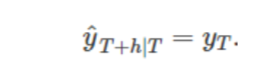

In [60]:
from sktime.forecasting.naive import NaiveForecaster

In [61]:
#model Building
forecaster = NaiveForecaster(strategy="last")

In [62]:
forecaster.fit(train)

NaiveForecaster()

In [63]:
SMA_eval_df

^NSEBANK         SMA_1         SMA_2       50 EWMA  \
Date                                                                 
2008-07-15   4838.950195   6263.195000   7966.090742   6031.406110   
2008-07-16   4726.450195   6200.286006   7955.237493   5980.214887   
2008-07-17   5034.750000   6143.951006   7945.112993   5943.126360   
2008-07-18   5389.149902   6095.443008   7935.049492   5921.395334   
2008-07-21   5601.500000   6052.601006   7926.106243   5908.846836   
...                  ...           ...           ...           ...   
2021-08-06  35809.250000  35114.232656  32260.314932  34886.822209   
2021-08-10  36034.101562  35141.230703  32325.661436  34931.813557   
2021-08-11  35806.398438  35155.457656  32388.736680  34966.111003   
2021-08-12  35937.050781  35171.369688  32449.187930  35004.187073   
2021-08-13  36169.351562  35188.012734  32511.470684  35049.879798   

                200 EWMA  
Date                      
2008-07-15   7327.622962  
2008-07-16   7297.736229  
2008-07-17   7271.775130  
2008-07-18   7250.210369  
2008-07-21   7231.353383  
...                  ...  
2021-08-06  32237.787997  
2021-08-10  32275.562261  
2021-08-11  32310.694960  
2021-08-12  32346.778102  
2021-08-13  32384.813659  

[2853 rows x 5 columns]

In [64]:
y_hat = test.copy = pd.DataFrame(test)

In [65]:
y_hat.head()

^NSEBANK
Date                    
2021-03-25  33006.449219
2021-03-26  33318.199219
2021-03-30  33875.101562
2021-03-31  33303.898438
2021-04-01  33858.000000

In [66]:
y_hat['^NaiveForecaster'] = float(train.iloc[-1])

In [67]:
y_hat.tail()

^NSEBANK  ^NaiveForecaster
Date                                      
2021-08-06  35809.250000          33293.25
2021-08-10  36034.101562          33293.25
2021-08-11  35806.398438          33293.25
2021-08-12  35937.050781          33293.25
2021-08-13  36169.351562          33293.25

In [68]:
len(test)

92

In [69]:
RMSE_naive = np.sqrt(mean_squared_error(y_hat["^NSEBANK"], y_hat["^NaiveForecaster"]))
print("rmse_naive:", RMSE_naive)
mape_naive = mean_absolute_percentage_error(y_hat["^NSEBANK"], y_hat["^NaiveForecaster"])
print("mape_naive:", mape_naive)

rmse_naive: 1631.9269179486241
mape_naive: 0.042172551873680346


In [70]:
List_Simple_Naive= ["Simple Naive Forecaster",RMSE_naive,mape_naive]
a_series = pd.Series(List_Simple_Naive, index = Model_eval_df.columns)
Model_eval_df = Model_eval_df.append(a_series, ignore_index=True)

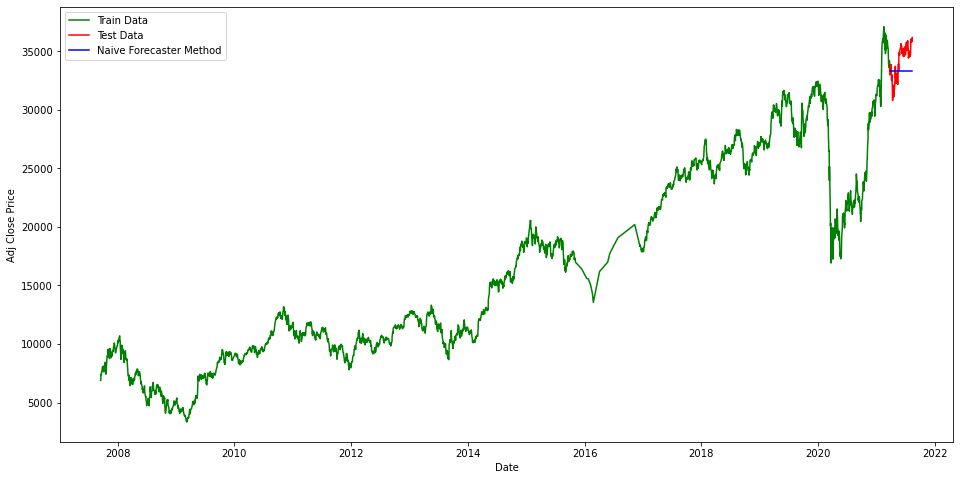

In [71]:
plt.figure(figsize=(16,8))
plt.plot(train,label='Train Data',linestyle='-',color='g')
plt.plot(test,label='Test Data',linestyle='-',color='r')
plt.plot(y_hat["^NaiveForecaster"][:920],label='Naive Forecaster Method',linestyle='-',color='b')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

In [72]:
Model_eval_df

Model Name         rmse      mape
0                    SMA50  1401.457754  0.060656
1                   SMA200  2848.935282  0.131210
2                   EWMA50  1201.707777  0.051219
3                  EWMA200  2350.473534  0.110070
4  Simple Naive Forecaster  1631.926918  0.042173

Simple Naive Forecaster is the Benchmark model, as we can see there is significant jump in error handling when we are predicting the price with Naive forecaster

## Smoothning methods

### Single (Simple) Exponential Smoothning

##### Single Exponential Smoothing, SES for short, also called Simple Exponential Smoothing, is a time series forecasting method for univariate data without a trend or seasonality. It requires a single parameter, called alpha also called the smoothing factor or smoothing coefficient. 
##### In Weighted Moving Average, you can give more weight to recent events, but you are limited to the last m observations. Exponential Smoothing improves on Weighted Moving Average by taking all previous observations into account, while still favoring the most recent observations.

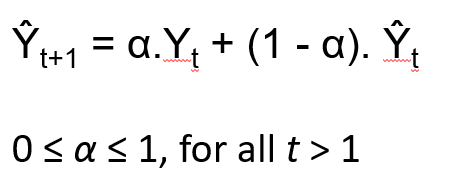

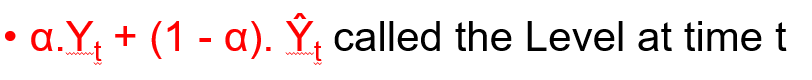

In [73]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.api import SimpleExpSmoothing

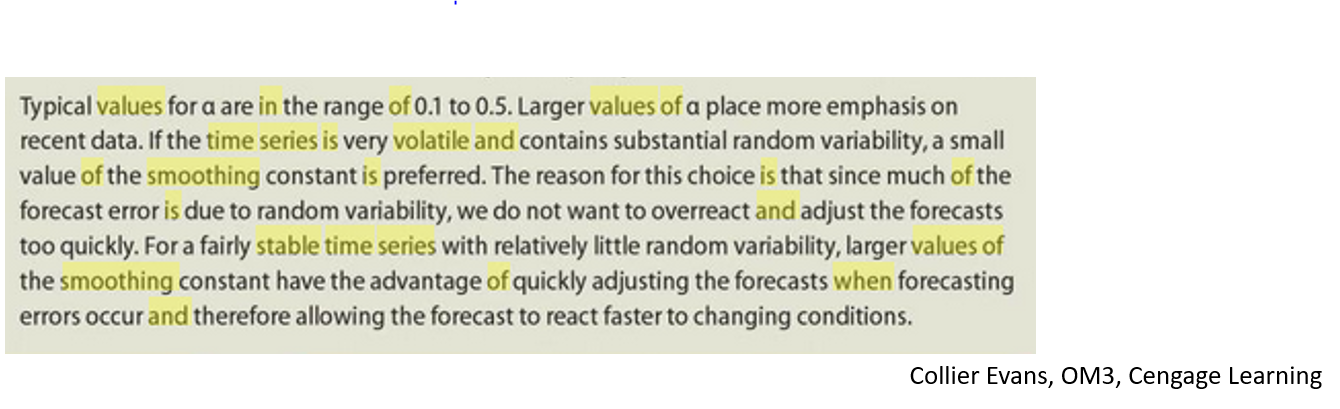

A small α is suitable to be used for stable time series data while a large α is to deal with a series that change rapidly
as BNF is a very Volatile Index, we will be using suppled alpha as 0.78

In [74]:
# fit a SES without specifying smooth parameter, so library does it for us
fitx = SimpleExpSmoothing(np.asarray(train)).fit(optimized=True)
print('optimal alpha chosen:', fitx.model.params['smoothing_level'])
alpha_fitx = fitx.model.params['smoothing_level']

optimal alpha chosen: 0.995


In [75]:
# fit a SES with explicitly supplied smooth parameter
alpha_fit2 = float(input("Alpha for model_2 : "))
fit2 = SimpleExpSmoothing(np.asarray(train)).fit(smoothing_level=alpha_fit2, optimized=False)

Alpha for model_2 : 0.45


In [76]:
len(fit2.fittedvalues)

2960

In [77]:
len(fitx.fittedvalues)

2960

In [78]:
len(train)

2960

In [79]:
SES_df = pd.DataFrame(train)

In [80]:
fig = px.line(SES_df, title='Time Series with Rangeslider')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [81]:
c = len(test)

In [82]:
# forecast using both models
y_hat["SES_opti_fcast"] = fitx.forecast(c)
y_hat["SES_manu_fcast"] = fit2.forecast(c)

In [83]:
y_hat.head()

^NSEBANK  ^NaiveForecaster  SES_opti_fcast  SES_manu_fcast
Date                                                                      
2021-03-25  33006.449219          33293.25    33297.691288    33716.916934
2021-03-26  33318.199219          33293.25    33297.691288    33716.916934
2021-03-30  33875.101562          33293.25    33297.691288    33716.916934
2021-03-31  33303.898438          33293.25    33297.691288    33716.916934
2021-04-01  33858.000000          33293.25    33297.691288    33716.916934

In [84]:
len(y_hat)

92

In [85]:
len(test)

92

In [86]:
len(train)

2960

In [87]:
# print the rmse of training step
rms_SES_opt = np.sqrt(mean_squared_error(y_hat["^NSEBANK"], y_hat["SES_opti_fcast"])) 
print('rmse for fitted values with optimal alpha: ', rms_SES_opt)
rms_SES_supplied = np.sqrt(mean_squared_error(y_hat["^NSEBANK"], y_hat["SES_manu_fcast"])) 
print('rmse for fitted values with supplied alpha: ', rms_SES_supplied)
mape_SES_opt = mean_absolute_percentage_error(y_hat["^NSEBANK"], y_hat["SES_opti_fcast"])
print("SMA mape:", mape_SES_opt)
mape_SES_supplied = mean_absolute_percentage_error(y_hat["^NSEBANK"], y_hat["SES_manu_fcast"])
print("SMA mape:", mape_SES_supplied)

rmse for fitted values with optimal alpha:  1629.423981091491
rmse for fitted values with supplied alpha:  1436.0049723173693
SMA mape: 0.04211727808429657
SMA mape: 0.03786837850582214


In [88]:
#Optimal Alpha Model Eval
List_SSE_opti= ["Simple Expo. Smoothning - Opmimal Alpha",rms_SES_opt,mape_SES_opt]
a_series = pd.Series(List_SSE_opti, index = Model_eval_df.columns)
Model_eval_df = Model_eval_df.append(a_series, ignore_index=True)
#Provided Alpha Model Eval
List_SSE_supplied= ["Simple Expo. Smoothning - Supplied Alpha",rms_SES_supplied,mape_SES_supplied]
a_series = pd.Series(List_SSE_supplied, index = Model_eval_df.columns)
Model_eval_df = Model_eval_df.append(a_series, ignore_index=True)

In [89]:
Model_eval_df

Model Name         rmse      mape
0                                     SMA50  1401.457754  0.060656
1                                    SMA200  2848.935282  0.131210
2                                    EWMA50  1201.707777  0.051219
3                                   EWMA200  2350.473534  0.110070
4                   Simple Naive Forecaster  1631.926918  0.042173
5   Simple Expo. Smoothning - Opmimal Alpha  1629.423981  0.042117
6  Simple Expo. Smoothning - Supplied Alpha  1436.004972  0.037868

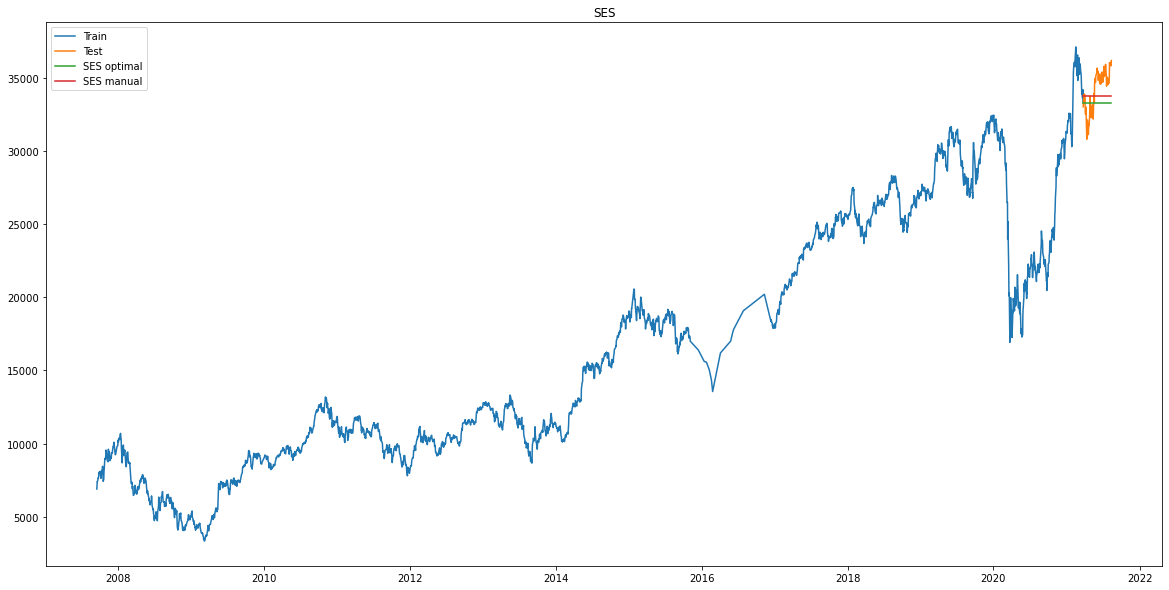

In [90]:
plt.figure(figsize = (20,10))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(y_hat.index, y_hat['SES_opti_fcast'], label='SES optimal')
plt.plot(y_hat.index, y_hat['SES_manu_fcast'], label='SES manual')
plt.legend(loc = 'best')
plt.title("SES")
plt.show()

Observation : Here we can see that though we have used the Smoothning factor Alpha, there is no consideration of trend and Seasonality in the model, hence model is predicting on the basis of the Previous price action

In [91]:
Model_eval_df

Model Name         rmse      mape
0                                     SMA50  1401.457754  0.060656
1                                    SMA200  2848.935282  0.131210
2                                    EWMA50  1201.707777  0.051219
3                                   EWMA200  2350.473534  0.110070
4                   Simple Naive Forecaster  1631.926918  0.042173
5   Simple Expo. Smoothning - Opmimal Alpha  1629.423981  0.042117
6  Simple Expo. Smoothning - Supplied Alpha  1436.004972  0.037868

Model Evaluation : 
 - we can see there is significant reduction in RMSE with optimal Alpha but Mape is not that significant
 - This method is useful when the data does not indicate trend, seasonality but just noise around a constant level or say Few data points, Irregular data, No seasonality or trend then we can use this model

## Double exponential smoothing ( Holt's Linear Model)

 - Double Exponential Smoothing is an extension to Exponential Smoothing that explicitly adds support for trends but not seasonality time series. In addition to the alpha parameter for controlling smoothing factor for the level, an additional smoothing factor is added to control the decay of the influence of the change in trend called beta.
 - This is useful when data shows a trend but no seasonality
 - We model the data as :
    - Level (l)
    - Trend (b) 
    - smoothing level alpha
    - Smoothing slope beta

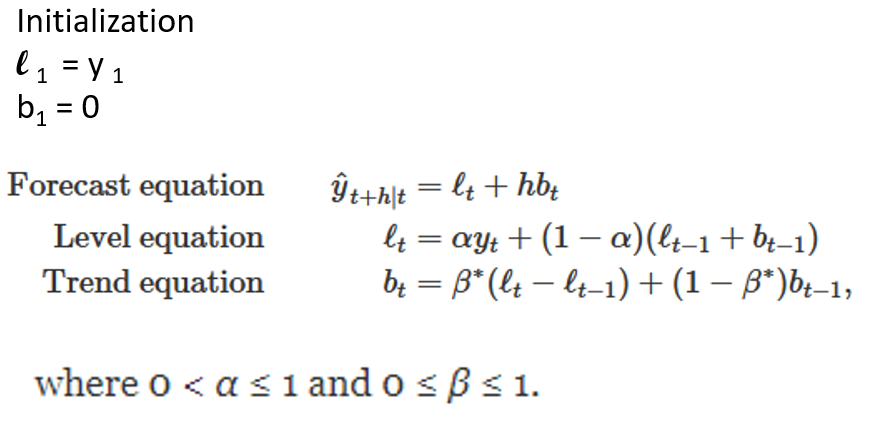

In [92]:
from statsmodels.tsa.api import Holt
DES = Holt(train).fit(optimized=True)

In [93]:
DES.fittedvalues

Date
2007-09-17     7059.649902
2007-09-18     7056.631024
2007-09-19     7218.424146
2007-09-20     7564.046027
2007-09-21     7550.033358
                  ...     
2021-03-18    34279.639561
2021-03-19    33896.137922
2021-03-22    34203.754707
2021-03-23    33635.780794
2021-03-24    34223.917425
Length: 2960, dtype: float64

In [94]:
DES.params['smoothing_level']

0.995

In [95]:
DES.params['smoothing_trend']

0.02369047619047619

Alpha: 0.995
Beta: 0.02369047619047619


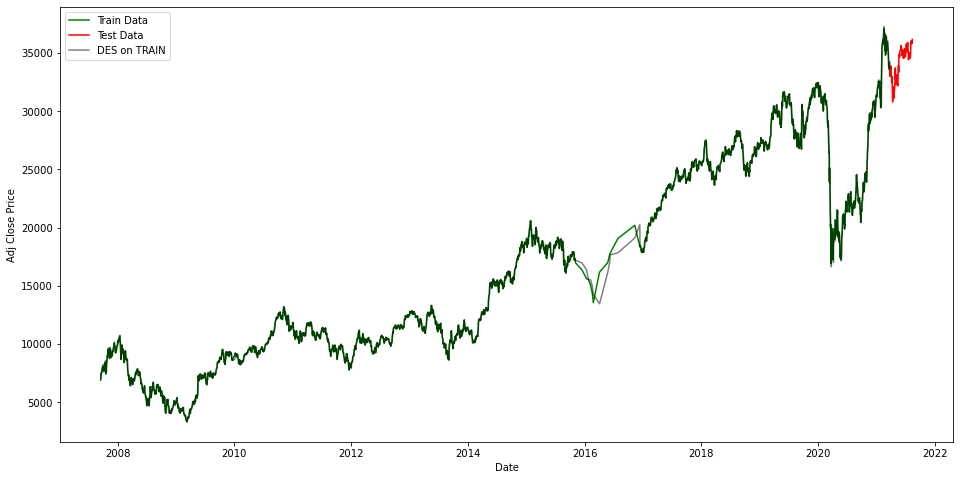

In [96]:
plt.figure(figsize=(16,8))
plt.plot(train,label='Train Data',linestyle='-',color='g')
plt.plot(test,label='Test Data',linestyle='-',color='r')
print('Alpha:',DES.params['smoothing_level'])
print('Beta:',DES.params['smoothing_trend'])
plt.plot(DES.fittedvalues,label='DES on TRAIN',linestyle='-',color='black',alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

In [97]:
y_hat['DES_forecasted'] = DES.forecast(len(test)).values

In [98]:
y_hat

^NSEBANK  ^NaiveForecaster  SES_opti_fcast  SES_manu_fcast  \
Date                                                                         
2021-03-25  33006.449219          33293.25    33297.691288    33716.916934   
2021-03-26  33318.199219          33293.25    33297.691288    33716.916934   
2021-03-30  33875.101562          33293.25    33297.691288    33716.916934   
2021-03-31  33303.898438          33293.25    33297.691288    33716.916934   
2021-04-01  33858.000000          33293.25    33297.691288    33716.916934   
...                  ...               ...             ...             ...   
2021-08-06  35809.250000          33293.25    33297.691288    33716.916934   
2021-08-10  36034.101562          33293.25    33297.691288    33716.916934   
2021-08-11  35806.398438          33293.25    33297.691288    33716.916934   
2021-08-12  35937.050781          33293.25    33297.691288    33716.916934   
2021-08-13  36169.351562          33293.25    33297.691288    33716.916934   

            DES_forecasted  
Date                        
2021-03-25    33318.227698  
2021-03-26    33338.552059  
2021-03-30    33358.876420  
2021-03-31    33379.200780  
2021-04-01    33399.525141  
...                    ...  
2021-08-06    35086.447087  
2021-08-10    35106.771448  
2021-08-11    35127.095809  
2021-08-12    35147.420170  
2021-08-13    35167.744530  

[92 rows x 5 columns]

In [99]:
rms_DES = np.sqrt(mean_squared_error(y_hat["^NSEBANK"], y_hat["DES_forecasted"])) 
print('rmse for Double Exp Smoothning: ', rms_DES)
mape_DES = mean_absolute_percentage_error(y_hat["^NSEBANK"], y_hat["DES_forecasted"])
print("DES mape:", mape_DES)

rmse for Double Exp Smoothning:  966.5302035311669
DES mape: 0.023355870669969084


In [100]:
#Provided Alpha Model Eval
List_DES = ["Double Exp Smoothning",rms_DES,mape_DES]
a_series = pd.Series(List_DES, index = Model_eval_df.columns)
Model_eval_df = Model_eval_df.append(a_series, ignore_index=True)

In [101]:
Model_eval_df

Model Name         rmse      mape
0                                     SMA50  1401.457754  0.060656
1                                    SMA200  2848.935282  0.131210
2                                    EWMA50  1201.707777  0.051219
3                                   EWMA200  2350.473534  0.110070
4                   Simple Naive Forecaster  1631.926918  0.042173
5   Simple Expo. Smoothning - Opmimal Alpha  1629.423981  0.042117
6  Simple Expo. Smoothning - Supplied Alpha  1436.004972  0.037868
7                     Double Exp Smoothning   966.530204  0.023356

Alpha: 0.995
Beta: 0.02369047619047619


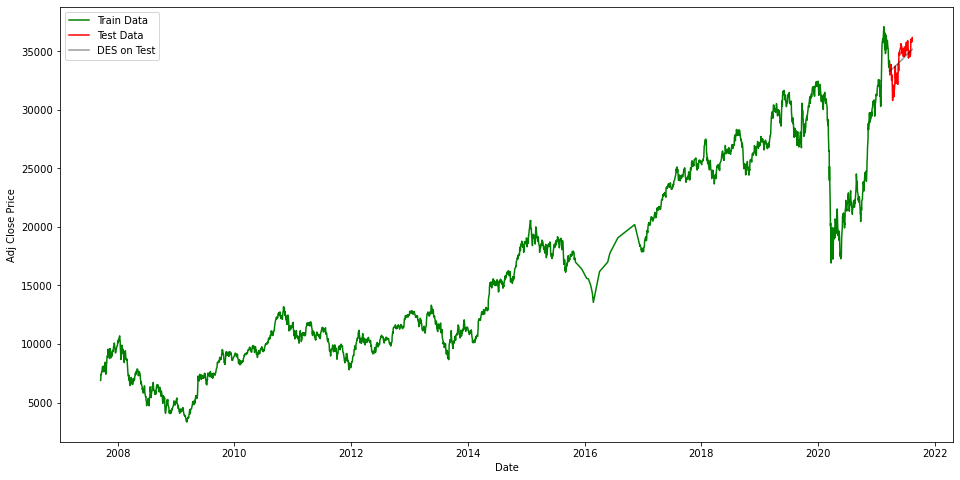

In [102]:
plt.figure(figsize=(16,8))
plt.plot(train,label='Train Data',linestyle='-',color='g')
plt.plot(test,label='Test Data',linestyle='-',color='r')
print('Alpha:',DES.params['smoothing_level'])
print('Beta:',DES.params['smoothing_trend'])
plt.plot(y_hat['DES_forecasted'],label='DES on Test',linestyle='-',color='black',alpha=0.4)
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

Double Exponential Smoothning_Damped

In [103]:
DDES = Holt(train).fit(smoothing_level=0.9,smoothing_slope=0.023,damping_slope=0.8)

In [104]:
DDES.params

{'smoothing_level': 0.9,
 'smoothing_trend': 0.023,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 6877.656869559688,
 'initial_trend': 35.61709142070354,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [105]:
y_hat['Damped Double Expo Smoothing'] = DDES.forecast(len(test)).values

In [106]:
y_hat.tail()

^NSEBANK  ^NaiveForecaster  SES_opti_fcast  SES_manu_fcast  \
Date                                                                         
2021-08-06  35809.250000          33293.25    33297.691288    33716.916934   
2021-08-10  36034.101562          33293.25    33297.691288    33716.916934   
2021-08-11  35806.398438          33293.25    33297.691288    33716.916934   
2021-08-12  35937.050781          33293.25    33297.691288    33716.916934   
2021-08-13  36169.351562          33293.25    33297.691288    33716.916934   

            DES_forecasted  Damped Double Expo Smoothing  
Date                                                      
2021-08-06    35086.447087                  35502.885472  
2021-08-10    35106.771448                  35526.989851  
2021-08-11    35127.095809                  35551.094230  
2021-08-12    35147.420170                  35575.198608  
2021-08-13    35167.744530                  35599.302987

In [107]:
rms_DES_damped = np.sqrt(mean_squared_error(y_hat["^NSEBANK"], y_hat["Damped Double Expo Smoothing"])) 
print('rmse for Double Exp Smoothning: ', rms_DES_damped)
mape_DES_damped = mean_absolute_percentage_error(y_hat["^NSEBANK"], y_hat["Damped Double Expo Smoothing"])
print("DES mape:", mape_DES_damped)

rmse for Double Exp Smoothning:  957.4636034037217
DES mape: 0.02211657876405519


In [108]:
#Provided Alpha Model Eval
List_DES = ["Double Exp Smoothning - Damped ",rms_DES_damped,mape_DES_damped]
a_series = pd.Series(List_DES, index = Model_eval_df.columns)
Model_eval_df = Model_eval_df.append(a_series, ignore_index=True)

In [109]:
Model_eval_df

Model Name         rmse      mape
0                                     SMA50  1401.457754  0.060656
1                                    SMA200  2848.935282  0.131210
2                                    EWMA50  1201.707777  0.051219
3                                   EWMA200  2350.473534  0.110070
4                   Simple Naive Forecaster  1631.926918  0.042173
5   Simple Expo. Smoothning - Opmimal Alpha  1629.423981  0.042117
6  Simple Expo. Smoothning - Supplied Alpha  1436.004972  0.037868
7                     Double Exp Smoothning   966.530204  0.023356
8           Double Exp Smoothning - Damped    957.463603  0.022117

Alpha: 0.995
Beta: 0.02369047619047619


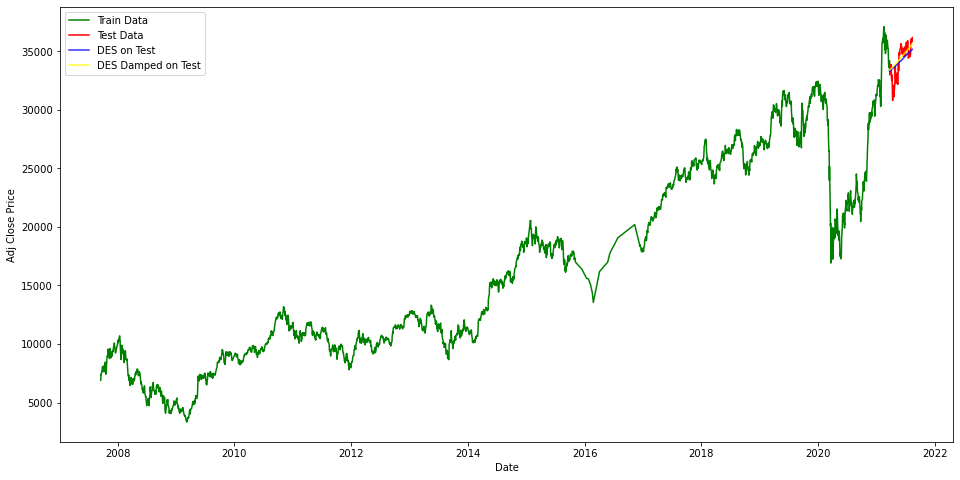

In [110]:
plt.figure(figsize=(16,8))
plt.plot(train,label='Train Data',linestyle='-',color='g')
plt.plot(test,label='Test Data',linestyle='-',color='r')
print('Alpha:',DES.params['smoothing_level'])
print('Beta:',DES.params['smoothing_trend'])
plt.plot(y_hat['DES_forecasted'],label='DES on Test',linestyle='-',color='blue',alpha=0.8)
plt.plot(y_hat['Damped Double Expo Smoothing'],label='DES Damped on Test',linestyle='-',color='yellow',alpha=0.8)
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

### Seasonality Decomposition

In [111]:
plt.rcParams.update({'figure.figsize':(20,20)})

Text(0.5, 1.0, 'multiplicative Decomposition')

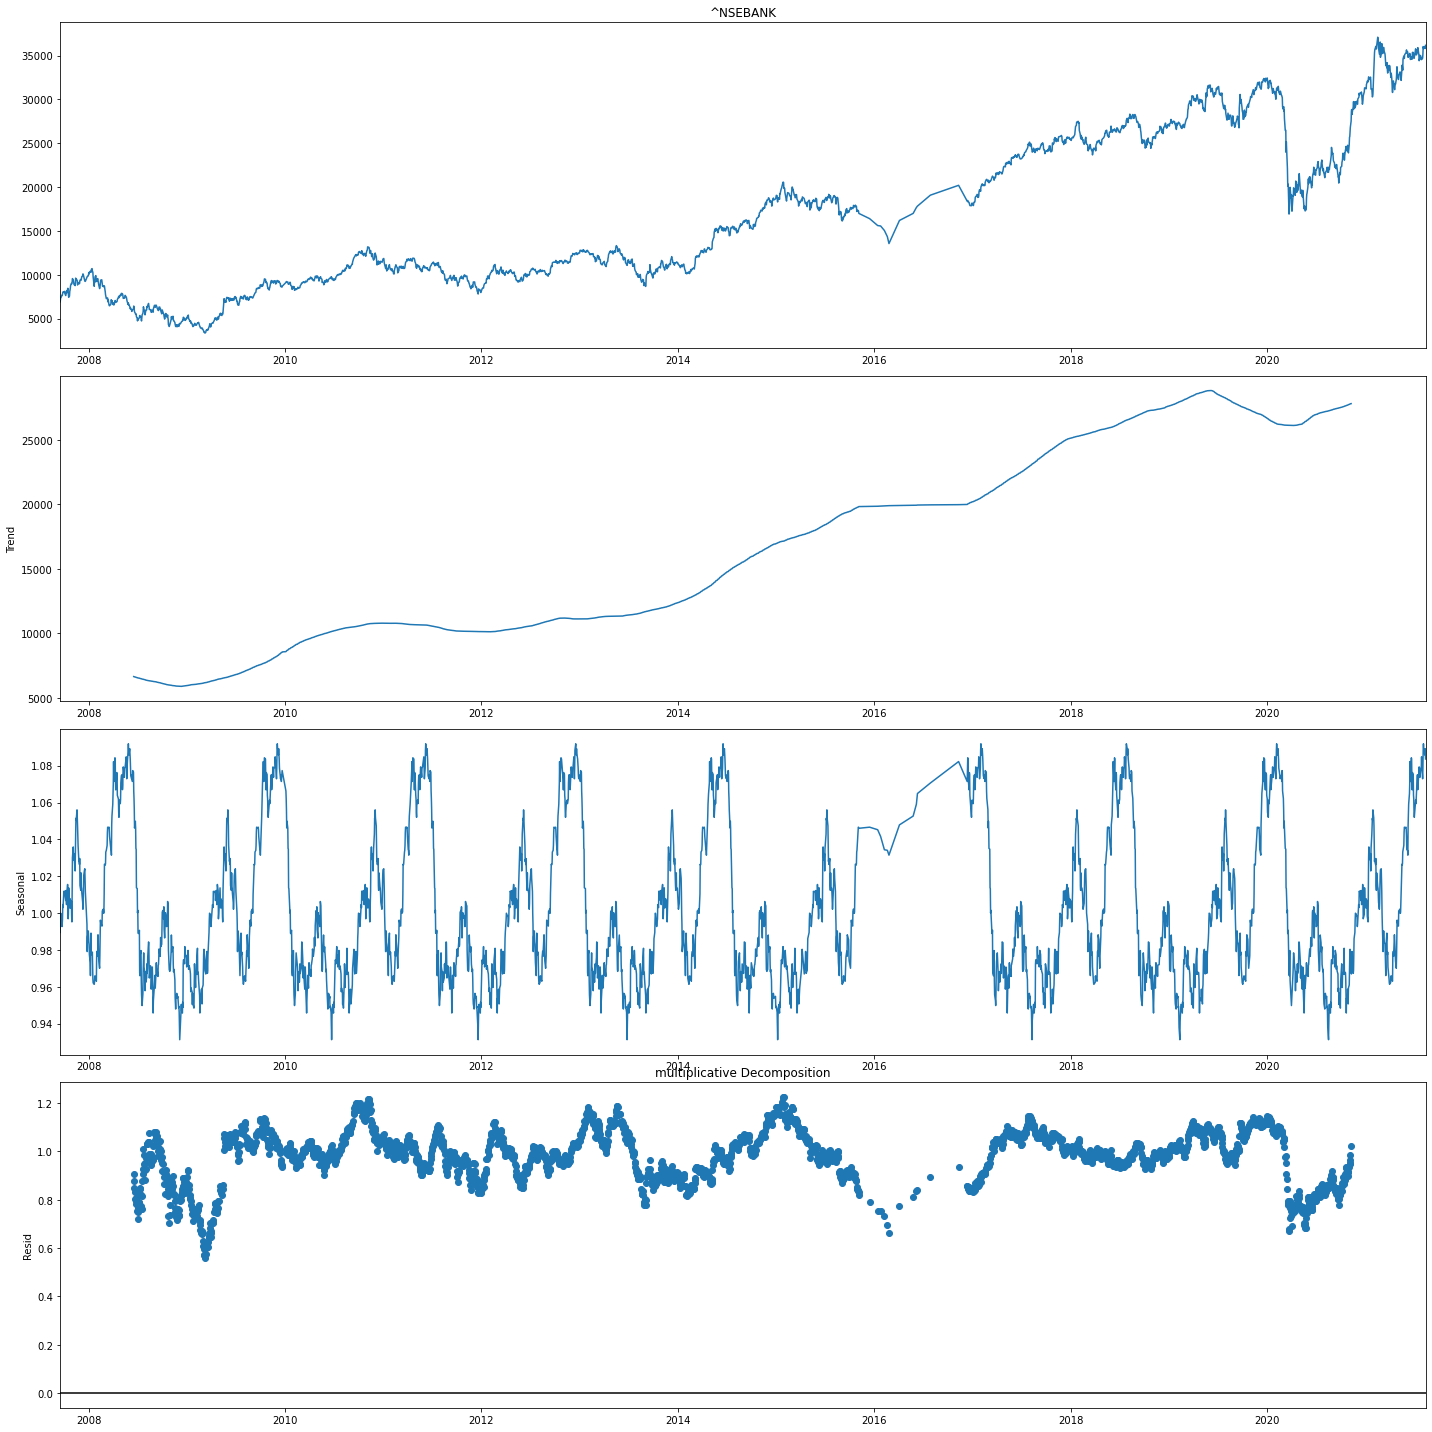

In [112]:
decomp_A = seasonal_decompose(df_close['^NSEBANK'],model='multiplicative',period=360)
decomp_A.plot()
plt.title('multiplicative Decomposition')

Text(0.5, 1.0, 'multiplicative Decomposition')

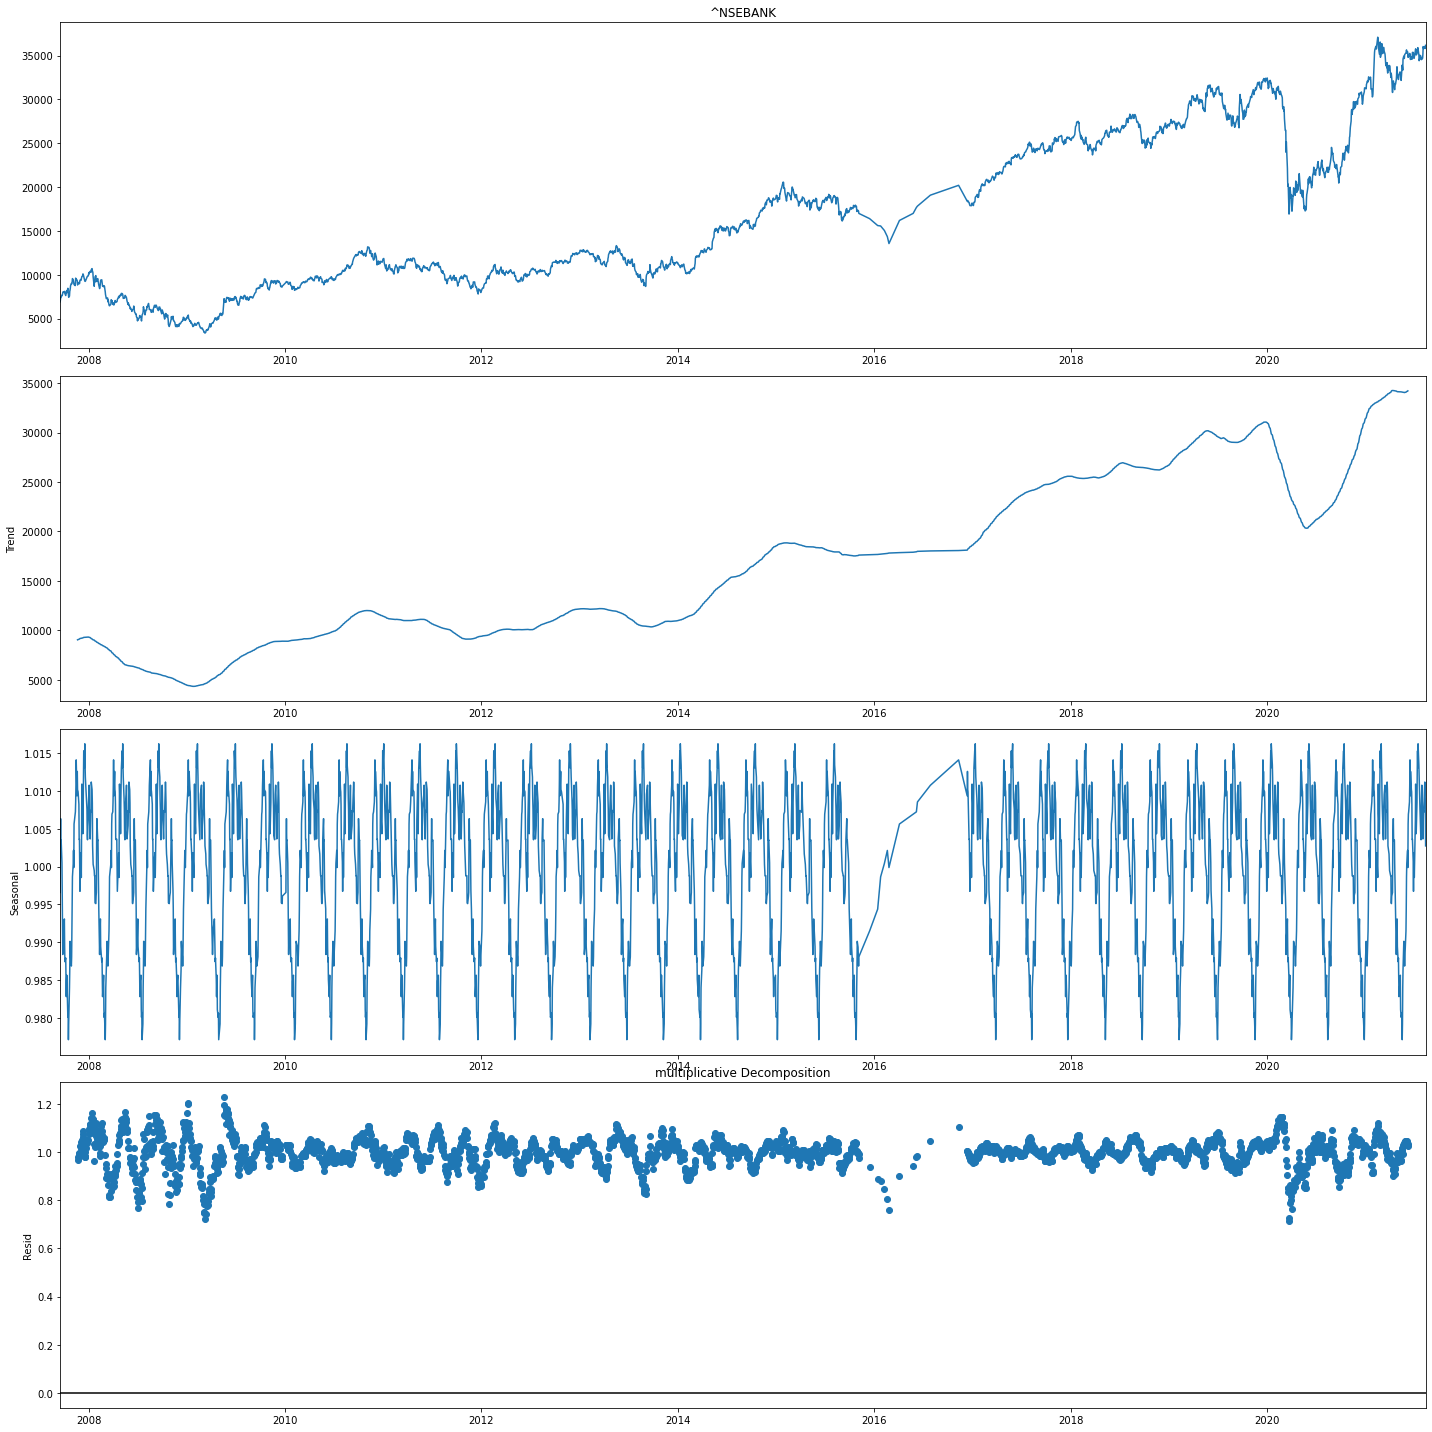

In [113]:
decomp_A = seasonal_decompose(df_close['^NSEBANK'],model='multiplicative',period=90)
decomp_A.plot()
plt.title('multiplicative Decomposition')

##### And  WOW......Accidently we found that Market is going up as per seasonality, on Monthly and 2 Monthly Basis

So, it looks like Seasonality is the Important Component for the BankNifty, that we can use in the further models
But from Seasonality itself it is showing the uptrend

### Tripple Exponential Smoothing

We use TES when there is seasonality in dataset aprt from level and trend. Datasets which show a similar set of pattern after fixed intervals of a time period have seasonality.
so, Main factors of Tripple Exp Smoothing are  Level (L), trend (b), seasonality (s), frequency of seasons (m)
Alpha, beta and gamma are the smoothing parameters
and equations are given by
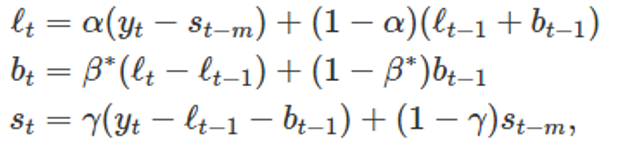


###### Here we will be Predicting only for 90 Days since BNF is too Volatile to predict

In [114]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [115]:
TEXM = ExponentialSmoothing(train,trend='add',seasonal='mul',seasonal_periods=30).fit(optimized=True)

In [116]:
TEXM.params

{'smoothing_level': 0.8535714285714285,
 'smoothing_trend': 0.0001,
 'smoothing_seasonal': 0.10649350649350652,
 'damping_trend': nan,
 'initial_level': 16089.423238735006,
 'initial_trend': 47.64655544704861,
 'initial_seasons': array([0.42867292, 0.43877582, 0.46004446, 0.45931727, 0.46393832,
        0.47552357, 0.47417175, 0.48204959, 0.48688196, 0.49984391,
        0.49644415, 0.50330579, 0.49945233, 0.48760294, 0.47400083,
        0.49074786, 0.49912603, 0.50709088, 0.49311898, 0.51501534,
        0.52532649, 0.5034301 , 0.47290384, 0.4614087 , 0.47037112,
        0.50350469, 0.51143228, 0.52386281, 0.54382934, 0.5594203 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [117]:
y_hat['Tripple Expo Smoothing'] = TEXM.forecast(len(test)).values

In [118]:
y_hat.tail()

^NSEBANK  ^NaiveForecaster  SES_opti_fcast  SES_manu_fcast  \
Date                                                                         
2021-08-06  35809.250000          33293.25    33297.691288    33716.916934   
2021-08-10  36034.101562          33293.25    33297.691288    33716.916934   
2021-08-11  35806.398438          33293.25    33297.691288    33716.916934   
2021-08-12  35937.050781          33293.25    33297.691288    33716.916934   
2021-08-13  36169.351562          33293.25    33297.691288    33716.916934   

            DES_forecasted  Damped Double Expo Smoothing  \
Date                                                       
2021-08-06    35086.447087                  35502.885472   
2021-08-10    35106.771448                  35526.989851   
2021-08-11    35127.095809                  35551.094230   
2021-08-12    35147.420170                  35575.198608   
2021-08-13    35167.744530                  35599.302987   

            Tripple Expo Smoothing  
Date                                
2021-08-06            34926.894454  
2021-08-10            35035.712576  
2021-08-11            35183.486635  
2021-08-12            34954.758231  
2021-08-13            35193.997395

In [119]:
y_hat["Tripple Expo Smoothing"]

Date
2021-03-25    33225.698042
2021-03-26    33454.059386
2021-03-30    33533.322292
2021-03-31    33384.273347
2021-04-01    33580.541809
                  ...     
2021-08-06    34926.894454
2021-08-10    35035.712576
2021-08-11    35183.486635
2021-08-12    34954.758231
2021-08-13    35193.997395
Name: Tripple Expo Smoothing, Length: 92, dtype: float64

In [120]:
rms_TES = np.sqrt(mean_squared_error(y_hat["^NSEBANK"], y_hat["Tripple Expo Smoothing"])) 
print('rmse for Tripple Exp Smoothning: ', rms_TES)
mape_TES = mean_absolute_percentage_error(y_hat["^NSEBANK"], y_hat["Tripple Expo Smoothing"])
print("DES mape:", mape_TES)

rmse for Tripple Exp Smoothning:  1169.7493395585172
DES mape: 0.024795098327704233


In [121]:
#Provided Alpha Model Eval
List_TES = ["Tripple Exp Smoothning - Damped ",rms_TES,mape_TES]
a_series = pd.Series(List_TES, index = Model_eval_df.columns)
Model_eval_df = Model_eval_df.append(a_series, ignore_index=True)

Alpha: 0.995
Beta: 0.02369047619047619


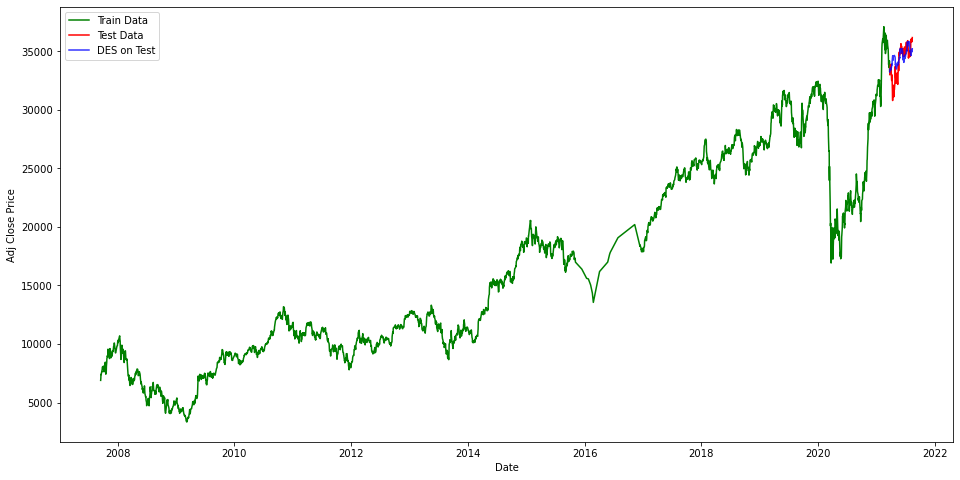

In [122]:
plt.figure(figsize=(16,8))
plt.plot(train,label='Train Data',linestyle='-',color='g')
plt.plot(test,label='Test Data',linestyle='-',color='r')
print('Alpha:',DES.params['smoothing_level'])
print('Beta:',DES.params['smoothing_trend'])
plt.plot(y_hat["Tripple Expo Smoothing"],label='DES on Test',linestyle='-',color='blue',alpha=0.8)
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

In [123]:
Model_eval_df

Model Name         rmse      mape
0                                     SMA50  1401.457754  0.060656
1                                    SMA200  2848.935282  0.131210
2                                    EWMA50  1201.707777  0.051219
3                                   EWMA200  2350.473534  0.110070
4                   Simple Naive Forecaster  1631.926918  0.042173
5   Simple Expo. Smoothning - Opmimal Alpha  1629.423981  0.042117
6  Simple Expo. Smoothning - Supplied Alpha  1436.004972  0.037868
7                     Double Exp Smoothning   966.530204  0.023356
8           Double Exp Smoothning - Damped    957.463603  0.022117
9          Tripple Exp Smoothning - Damped   1169.749340  0.024795

#### ACF and PACF

we will be using df_stationary_bnf_close data frame

In [124]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [125]:
df_st_bnf = pd.DataFrame(df_stationary_bnf_close)
df_st_bnf.head()

^NSEBANK
Date                  
2007-09-18  162.549805
2007-09-19  342.200195
2007-09-20  -11.700195
2007-09-21   74.350098
2007-09-24  186.399902

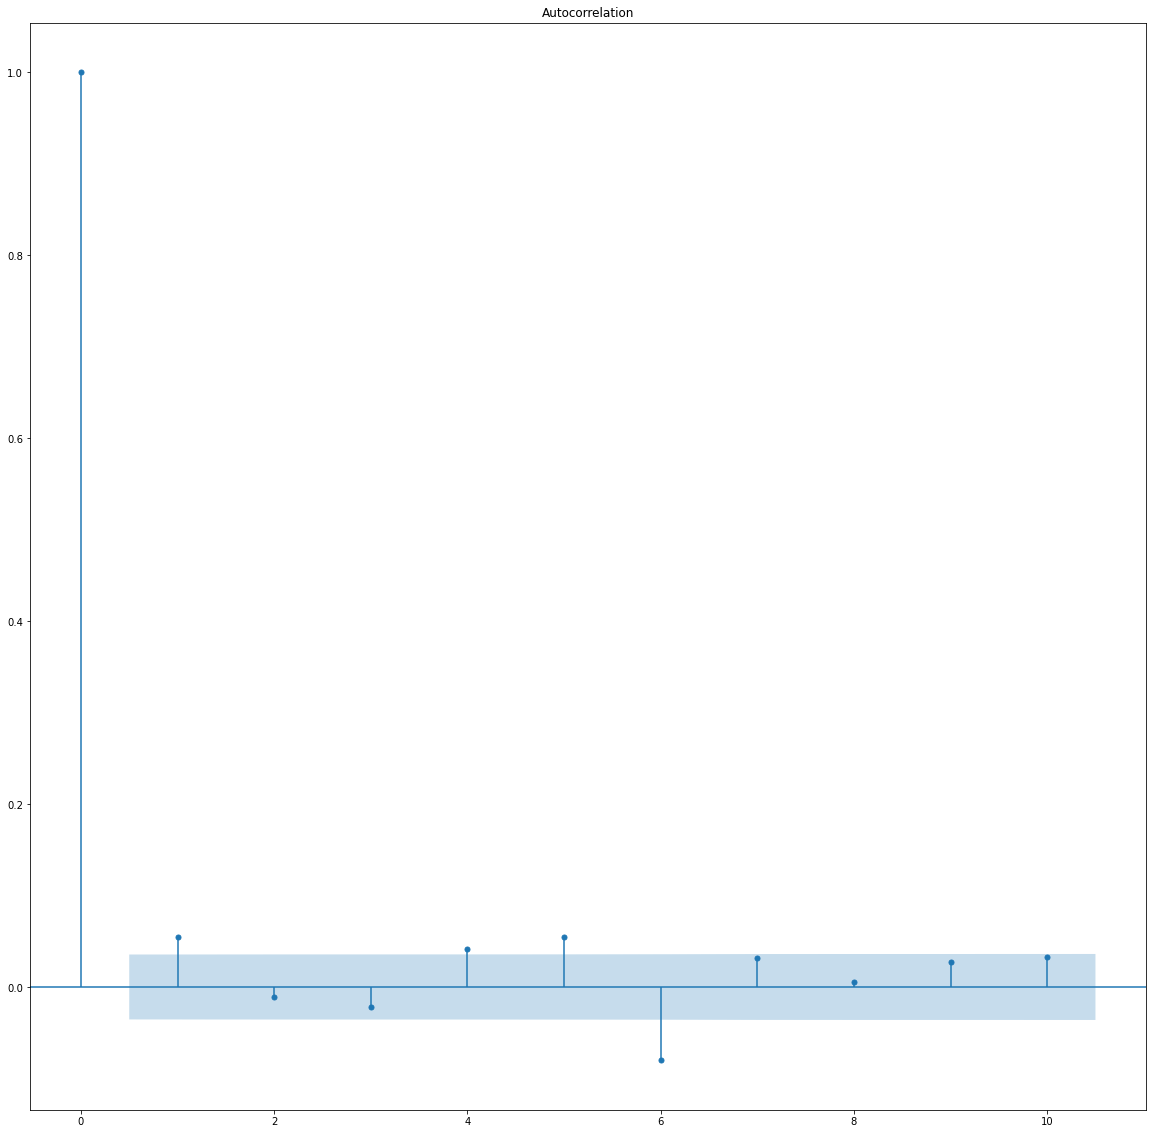

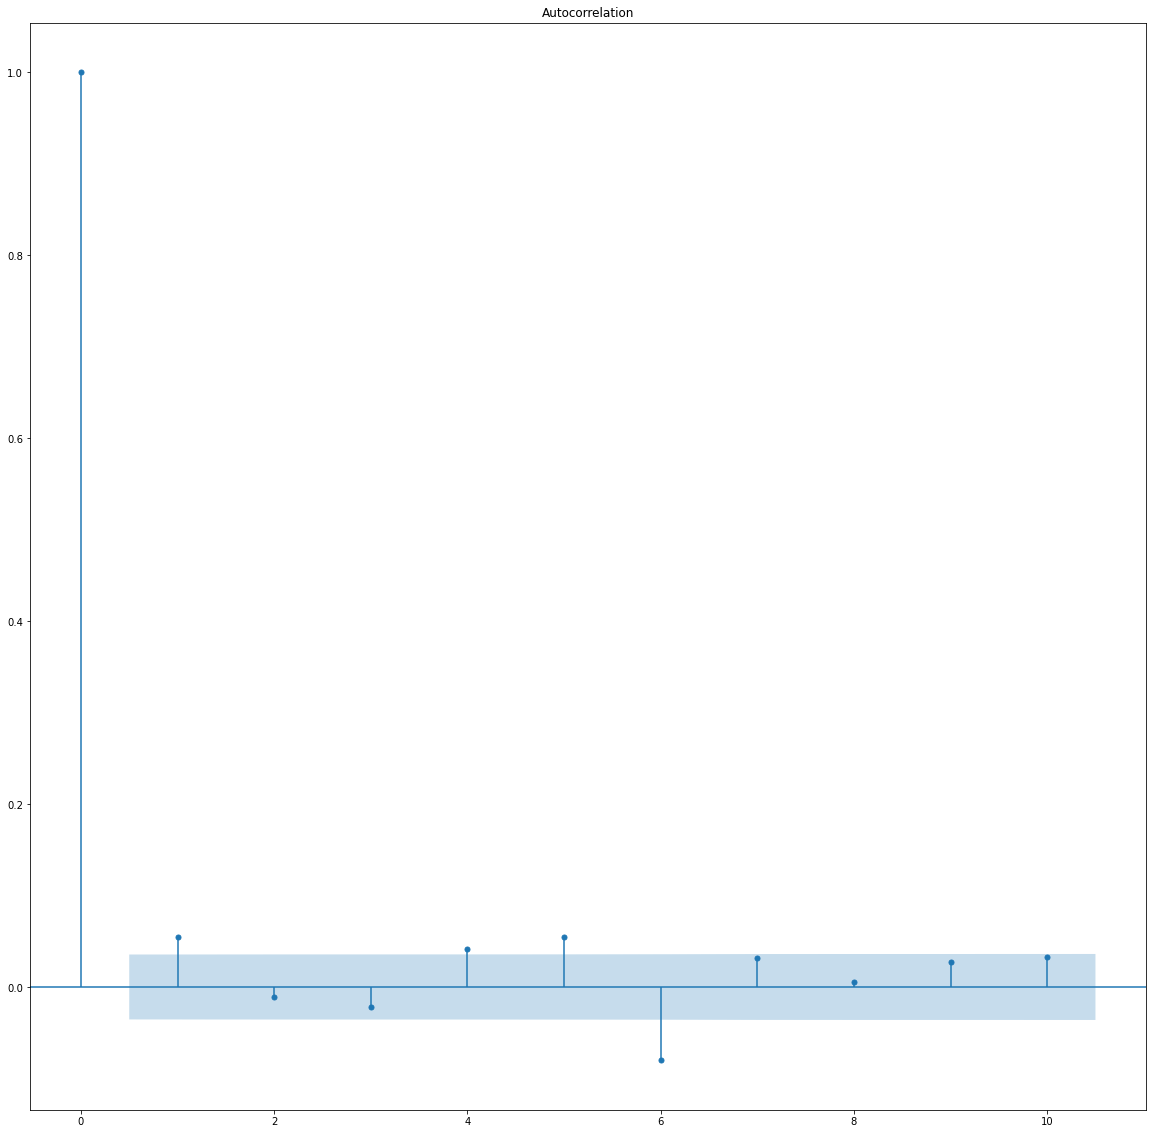

In [126]:
plot_acf((df_st_bnf["^NSEBANK"]), lags=10,alpha=0.05)

##### From above we can see that both PACF and ACF are tailing off from the 1st Order
##### so by seeing only the PACF and ACF we can assume the ARMA model would perform good, lets see

From Above PACF we gets the P = 1 and q=1

In [127]:
y_hat_st = (y_hat)

In [128]:
y_hat_st["^NSEBANK"] = test
y_hat_st

^NSEBANK  ^NaiveForecaster  SES_opti_fcast  SES_manu_fcast  \
Date                                                                         
2021-03-25  33006.449219          33293.25    33297.691288    33716.916934   
2021-03-26  33318.199219          33293.25    33297.691288    33716.916934   
2021-03-30  33875.101562          33293.25    33297.691288    33716.916934   
2021-03-31  33303.898438          33293.25    33297.691288    33716.916934   
2021-04-01  33858.000000          33293.25    33297.691288    33716.916934   
...                  ...               ...             ...             ...   
2021-08-06  35809.250000          33293.25    33297.691288    33716.916934   
2021-08-10  36034.101562          33293.25    33297.691288    33716.916934   
2021-08-11  35806.398438          33293.25    33297.691288    33716.916934   
2021-08-12  35937.050781          33293.25    33297.691288    33716.916934   
2021-08-13  36169.351562          33293.25    33297.691288    33716.916934   

            DES_forecasted  Damped Double Expo Smoothing  \
Date                                                       
2021-03-25    33318.227698                  33405.804515   
2021-03-26    33338.552059                  33429.908894   
2021-03-30    33358.876420                  33454.013273   
2021-03-31    33379.200780                  33478.117651   
2021-04-01    33399.525141                  33502.222030   
...                    ...                           ...   
2021-08-06    35086.447087                  35502.885472   
2021-08-10    35106.771448                  35526.989851   
2021-08-11    35127.095809                  35551.094230   
2021-08-12    35147.420170                  35575.198608   
2021-08-13    35167.744530                  35599.302987   

            Tripple Expo Smoothing  
Date                                
2021-03-25            33225.698042  
2021-03-26            33454.059386  
2021-03-30            33533.322292  
2021-03-31            33384.273347  
2021-04-01            33580.541809  
...                            ...  
2021-08-06            34926.894454  
2021-08-10            35035.712576  
2021-08-11            35183.486635  
2021-08-12            34954.758231  
2021-08-13            35193.997395  

[92 rows x 7 columns]

## 1. Autoregression Models

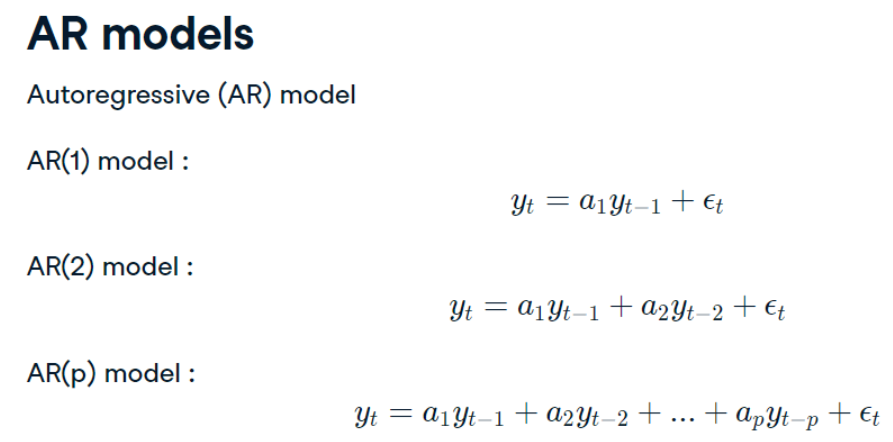

In [129]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARMA

In [130]:
mod_AR = ARMA(train,order=(1,0))

In [132]:
model_AR = AutoReg(train, 5, old_names=False).fit()
res_AR = mod_AR.fit()
print(res_AR.summary())

                              ARMA Model Results                              
Dep. Variable:               ^NSEBANK   No. Observations:                 2960
Model:                     ARMA(1, 0)   Log Likelihood              -21054.523
Method:                       css-mle   S.D. of innovations            296.737
Date:                Sun, 15 Aug 2021   AIC                          42115.046
Time:                        13:55:40   BIC                          42133.025
Sample:                             0   HQIC                         42121.517
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.614e+04   9734.966      1.658      0.097   -2942.280    3.52e+04
ar.L1.^NSEBANK     0.9997      0.000   2405.471      0.000       0.999       1.000
                                    

In [133]:
#plot_predict visualizes forecasts. Here we produce a large number of forecasts which show the string seasonality captured by the model.
AR_Pred = res_AR.predict(93)
y_hat_st["AR"] = AR_Pred

## MA


In [134]:
mod_MA = ARMA(train,order=(0,1))

In [136]:
model_MA = AutoReg(train, 5, old_names=False).fit()
res_MA = mod_MA.fit()
print(res_MA.summary())

                              ARMA Model Results                              
Dep. Variable:               ^NSEBANK   No. Observations:                 2960
Model:                     ARMA(0, 1)   Log Likelihood              -28875.358
Method:                       css-mle   S.D. of innovations           4169.576
Date:                Sun, 15 Aug 2021   AIC                          57756.715
Time:                        13:55:45   BIC                          57774.694
Sample:                             0   HQIC                         57763.187
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.614e+04    152.565    105.769      0.000    1.58e+04    1.64e+04
ma.L1.^NSEBANK     0.9911      0.003    332.753      0.000       0.985       0.997
                                    

In [137]:
#plot_predict visualizes forecasts. Here we produce a large number of forecasts which show the string seasonality captured by the model.
MA_Pred = res_MA.predict(93)
y_hat_st["MA"] = MA_Pred

## Autoregressive Moving Average (ARMA)


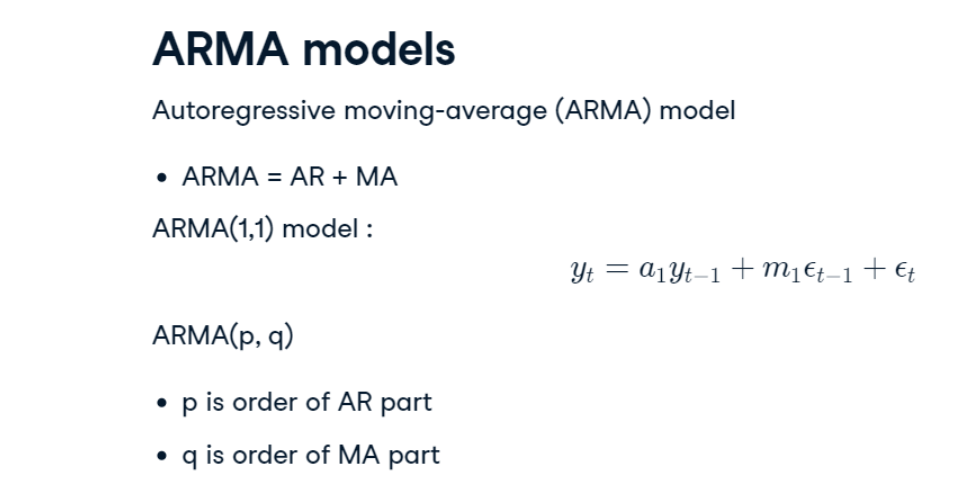

In [138]:
arma_mod = ARIMA(train, order=(1,0,1)).fit()

In [139]:
print(arma_mod.params)

const     16137.890074
ar.L1         0.999813
ma.L1         0.056680
sigma2    87812.134861
dtype: float64


In [140]:
res_ARMA = arma_mod
print(res_ARMA.summary())

                               SARIMAX Results                                
Dep. Variable:               ^NSEBANK   No. Observations:                 2960
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -21049.779
Date:                Sun, 15 Aug 2021   AIC                          42107.557
Time:                        13:55:53   BIC                          42131.529
Sample:                             0   HQIC                         42116.186
                               - 2960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.614e+04      0.241   6.69e+04      0.000    1.61e+04    1.61e+04
ar.L1          0.9998      0.000   2420.777      0.000       0.999       1.001
ma.L1          0.0567      0.009      6.037      0.0

In [141]:
#plot_predict visualizes forecasts. Here we produce a large number of forecasts which show the string seasonality captured by the model.
ARMA_pred = res_ARMA.predict(93)
y_hat_st["ARMA"] = ARMA_pred

In [142]:
y_hat_st.tail()

^NSEBANK  ^NaiveForecaster  SES_opti_fcast  SES_manu_fcast  \
Date                                                                         
2021-08-06  35809.250000          33293.25    33297.691288    33716.916934   
2021-08-10  36034.101562          33293.25    33297.691288    33716.916934   
2021-08-11  35806.398438          33293.25    33297.691288    33716.916934   
2021-08-12  35937.050781          33293.25    33297.691288    33716.916934   
2021-08-13  36169.351562          33293.25    33297.691288    33716.916934   

            DES_forecasted  Damped Double Expo Smoothing  \
Date                                                       
2021-08-06    35086.447087                  35502.885472   
2021-08-10    35106.771448                  35526.989851   
2021-08-11    35127.095809                  35551.094230   
2021-08-12    35147.420170                  35575.198608   
2021-08-13    35167.744530                  35599.302987   

            Tripple Expo Smoothing  AR  MA  ARMA  
Date                                              
2021-08-06            34926.894454 NaN NaN   NaN  
2021-08-10            35035.712576 NaN NaN   NaN  
2021-08-11            35183.486635 NaN NaN   NaN  
2021-08-12            34954.758231 NaN NaN   NaN  
2021-08-13            35193.997395 NaN NaN   NaN

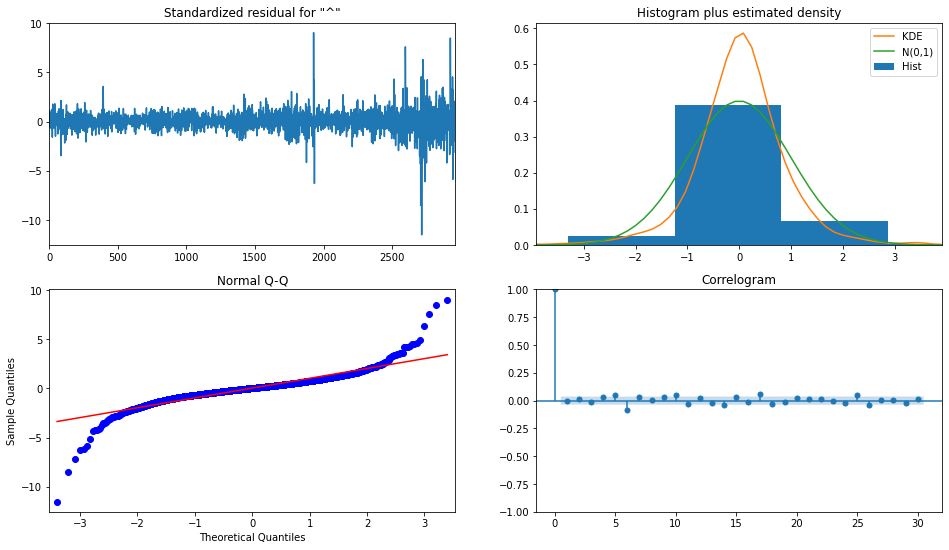

In [144]:
fig = plt.figure(figsize=(16,9))
fig = res_ARMA.plot_diagnostics(fig=fig, lags=30)

## ARIMA

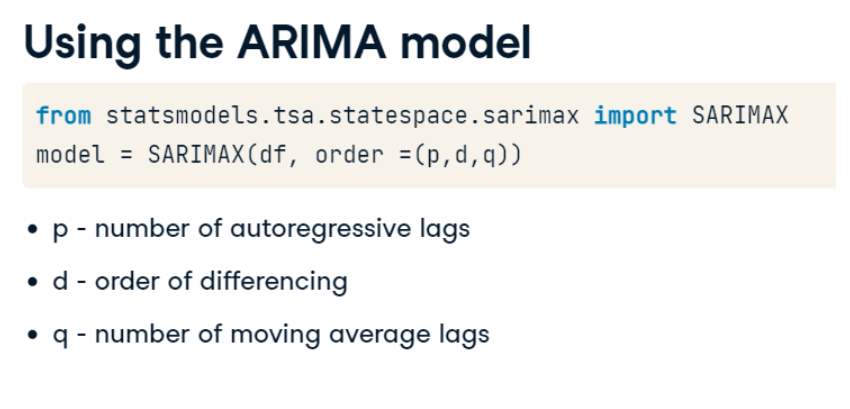

In [145]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [146]:
model = SARIMAX(df_close["^NSEBANK"], order=(1,1,1)).fit()

In [147]:
res = model
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:               ^NSEBANK   No. Observations:                 3052
Model:               SARIMAX(1, 1, 1)   Log Likelihood              -21760.980
Date:                Sun, 15 Aug 2021   AIC                          43527.959
Time:                        13:56:17   BIC                          43546.029
Sample:                             0   HQIC                         43534.453
                               - 3052                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0839      0.141     -0.595      0.552      -0.360       0.193
ma.L1          0.1402      0.139      1.006      0.314      -0.133       0.413
sigma2      9.184e+04    809.156    113.498      0.0

In [148]:
res.predict(93)

Date
2008-02-04     9333.997209
2008-02-05     9573.722563
2008-02-06     9386.871973
2008-02-07     9175.241129
2008-02-08     8949.233637
                  ...     
2021-08-06    35817.921873
2021-08-10    35810.173949
2021-08-11    36046.628323
2021-08-12    35791.825403
2021-08-13    35946.447970
Name: predicted_mean, Length: 2959, dtype: float64

In [186]:
from pmdarima import auto_arima

In [193]:
model1 = auto_arima(train,
                    start_p=0,start_q=0,
                    max_p=3,max_q=3,m=30,
                    trace=True,seasonal=True,
                    information_criterion='aic'
                    ,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[30] intercept   : AIC=inf, Time=9.61 sec
 ARIMA(0,1,0)(0,0,0)[30] intercept   : AIC=42089.133, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[30] intercept   : AIC=42082.669, Time=1.88 sec
 ARIMA(0,1,1)(0,0,1)[30] intercept   : AIC=42082.801, Time=2.48 sec
 ARIMA(0,1,0)(0,0,0)[30]             : AIC=42089.809, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[30] intercept   : AIC=42081.423, Time=0.28 sec
 ARIMA(1,1,0)(0,0,1)[30] intercept   : AIC=42082.601, Time=1.82 sec
 ARIMA(1,1,0)(1,0,1)[30] intercept   : AIC=inf, Time=9.31 sec
 ARIMA(2,1,0)(0,0,0)[30] intercept   : AIC=42083.245, Time=0.35 sec
 ARIMA(1,1,1)(0,0,0)[30] intercept   : AIC=42083.296, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[30] intercept   : AIC=42081.625, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[30] intercept   : AIC=42085.236, Time=0.44 sec
 ARIMA(1,1,0)(0,0,0)[30]             : AIC=42081.791, Time=0.11 sec

Best model:  ARIMA(1,1,0)(0,0,0)[30] intercept
Total fit time: 26.865 seconds


Here, we can see the best model to Predict the 30 Day BNF forecast is Best model:  ARIMA(1,1,0)(0,0,0)[30] intercept

## grangercausalitytests

Before going forward with the ARMAX and VAR, we need to check grangercausalitytests for BNF open w.r.t Previous day DJI close price

In [160]:
gc_df  = pd.DataFrame(df_close)
gc_df["BNF_open"] = df_BNF_open

In [164]:
gc_df = gc_df[["BNF_open", "^DJI"]]
gc_df

BNF_open          ^DJI
Date                                  
2007-09-17   6898.000000  13403.419922
2007-09-18   6921.149902  13739.389648
2007-09-19   7111.000000  13815.559570
2007-09-20   7404.950195  13766.700195
2007-09-21   7378.299805  13820.190430
...                  ...           ...
2021-08-06  35875.800781  35208.511719
2021-08-10  35954.550781  35264.671875
2021-08-11  36218.250000  35484.968750
2021-08-12  35825.398438  35499.851562
2021-08-13  36000.750000  35515.378906

[3052 rows x 2 columns]

In [165]:
from statsmodels.tsa.stattools import grangercausalitytests
gc_res = grangercausalitytests(gc_df.dropna(), maxlag = 5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=32.5725 , p=0.0000  , df_denom=3048, df_num=1
ssr based chi2 test:   chi2=32.6046 , p=0.0000  , df=1
likelihood ratio test: chi2=32.4316 , p=0.0000  , df=1
parameter F test:         F=32.5725 , p=0.0000  , df_denom=3048, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=250.2182, p=0.0000  , df_denom=3045, df_num=2
ssr based chi2 test:   chi2=501.2580, p=0.0000  , df=2
likelihood ratio test: chi2=464.0890, p=0.0000  , df=2
parameter F test:         F=250.2182, p=0.0000  , df_denom=3045, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=166.8915, p=0.0000  , df_denom=3042, df_num=3
ssr based chi2 test:   chi2=501.8267, p=0.0000  , df=3
likelihood ratio test: chi2=464.5663, p=0.0000  , df=3
parameter F test:         F=166.8915, p=0.0000  , df_denom=3042, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=133.2940, p=0.

Here, Significant P value suggest that at lag 1 BNF Open is caused due to the Closing Price of DJI

### ARMAX Model

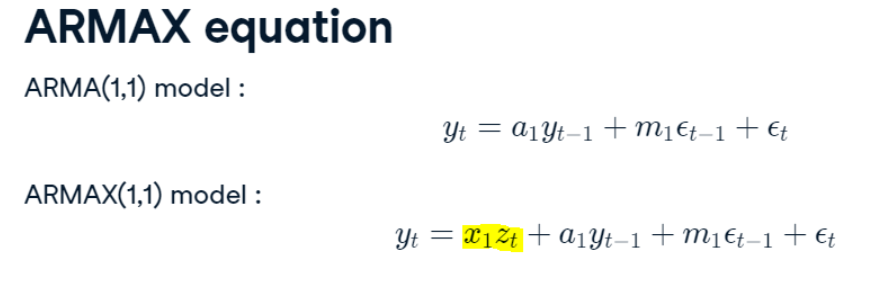

In [149]:
df_DJIclose
df_BNF_open

Date
2007-09-17     6898.000000
2007-09-18     6921.149902
2007-09-19     7111.000000
2007-09-20     7404.950195
2007-09-21     7378.299805
                  ...     
2021-08-06    35875.800781
2021-08-10    35954.550781
2021-08-11    36218.250000
2021-08-12    35825.398438
2021-08-13    36000.750000
Name: ^NSEBANK, Length: 3052, dtype: float64

In [150]:
model = SARIMAX(df_BNF_open, order=(1,1,1),exog = df_DJIclose ).fit()

In [151]:
res = model
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:               ^NSEBANK   No. Observations:                 3052
Model:               SARIMAX(1, 1, 1)   Log Likelihood              -21888.566
Date:                Sun, 15 Aug 2021   AIC                          43785.132
Time:                        13:56:23   BIC                          43809.225
Sample:                             0   HQIC                         43793.791
                               - 3052                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
^DJI           0.0750      0.011      6.901      0.000       0.054       0.096
ar.L1         -0.6856      0.081     -8.433      0.000      -0.845      -0.526
ma.L1          0.6422      0.087      7.385      0.0

In [152]:
y_hat_st["ARMAX"] = res.predict(93)

In [166]:
y_hat_st.head()

^NSEBANK  ^NaiveForecaster  SES_opti_fcast  SES_manu_fcast  \
Date                                                                         
2021-03-25  33006.449219          33293.25    33297.691288    33716.916934   
2021-03-26  33318.199219          33293.25    33297.691288    33716.916934   
2021-03-30  33875.101562          33293.25    33297.691288    33716.916934   
2021-03-31  33303.898438          33293.25    33297.691288    33716.916934   
2021-04-01  33858.000000          33293.25    33297.691288    33716.916934   

            DES_forecasted  Damped Double Expo Smoothing  \
Date                                                       
2021-03-25    33318.227698                  33405.804515   
2021-03-26    33338.552059                  33429.908894   
2021-03-30    33358.876420                  33454.013273   
2021-03-31    33379.200780                  33478.117651   
2021-04-01    33399.525141                  33502.222030   

            Tripple Expo Smoothing  AR  MA  ARMA         ARMAX  
Date                                                            
2021-03-25            33225.698042 NaN NaN   NaN  33872.997974  
2021-03-26            33454.059386 NaN NaN   NaN  33499.546872  
2021-03-30            33533.322292 NaN NaN   NaN  33569.321809  
2021-03-31            33384.273347 NaN NaN   NaN  33631.660257  
2021-04-01            33580.541809 NaN NaN   NaN  33756.696858

### Looking at AIC and BIC Criteria, we found that the ARMAX Model is predicting good BNF Open prices, with exog factor as DJI close 

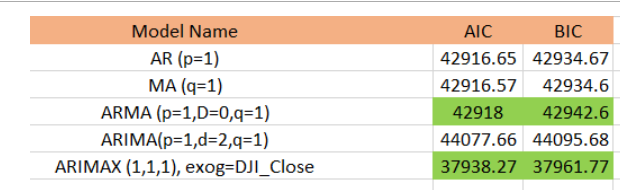

### VAR Model

In [167]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [176]:
# since VAR accepts only stationary data
var_df = df_close.copy()
var_df["BNF_st"] = df_stationary_bnf_open.dropna()
var_df["DJI_st"] = df_stationary_dji_close.dropna()
var_df = var_df[["BNF_st","DJI_st"]]

In [177]:
var_df

BNF_st      DJI_st
Date                              
2007-09-17         NaN         NaN
2007-09-18   23.149902  335.969727
2007-09-19  189.850098   76.169922
2007-09-20  293.950195  -48.859375
2007-09-21  -26.650391   53.490234
...                ...         ...
2021-08-06 -218.148438  144.261719
2021-08-10   78.750000   56.160156
2021-08-11  263.699219  220.296875
2021-08-12 -392.851562   14.882812
2021-08-13  175.351562   15.527344

[3052 rows x 2 columns]

In [183]:
var_df.dropna(inplace=True)

In [184]:
model = VAR(var_df)
model_fit = model.fit(maxlags = 1)
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 15, Aug, 2021
Time:                     14:12:02
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    22.2194
Nobs:                     3050.00    HQIC:                   22.2118
Log likelihood:          -42516.1    FPE:                4.41189e+09
AIC:                      22.2076    Det(Omega_mle):     4.40323e+09
--------------------------------------------------------------------
Results for equation BNF_st
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             6.141620         5.329562            1.152           0.249
L1.BNF_st        -0.034038         0.016837           -2.022           0.043
L1.DJI_st         0.512856         0.023339           21.974           0.00

## Volatility Forecasting (ARCH & GARCH)

In [206]:
from arch import arch_model

In [203]:
market = df_close["^NSEBANK"]
returns = 100 * market.pct_change().dropna()

In [207]:
# model fitting 
am = arch_model(returns, vol="Garch", p=1, o=0, q=1, dist="Normal")
res = am.fit(update_freq=5)

Iteration:      5,   Func. Count:     35,   Neg. LLF: 5912.474074366699
Iteration:     10,   Func. Count:     64,   Neg. LLF: 5877.849370373399
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5877.849172118171
            Iterations: 13
            Function evaluations: 78
            Gradient evaluations: 13


In [208]:
forecasts = res.forecast(reindex=False)

In [214]:
#Plotting Yearly Volatility

(13774.0, 18852.0)

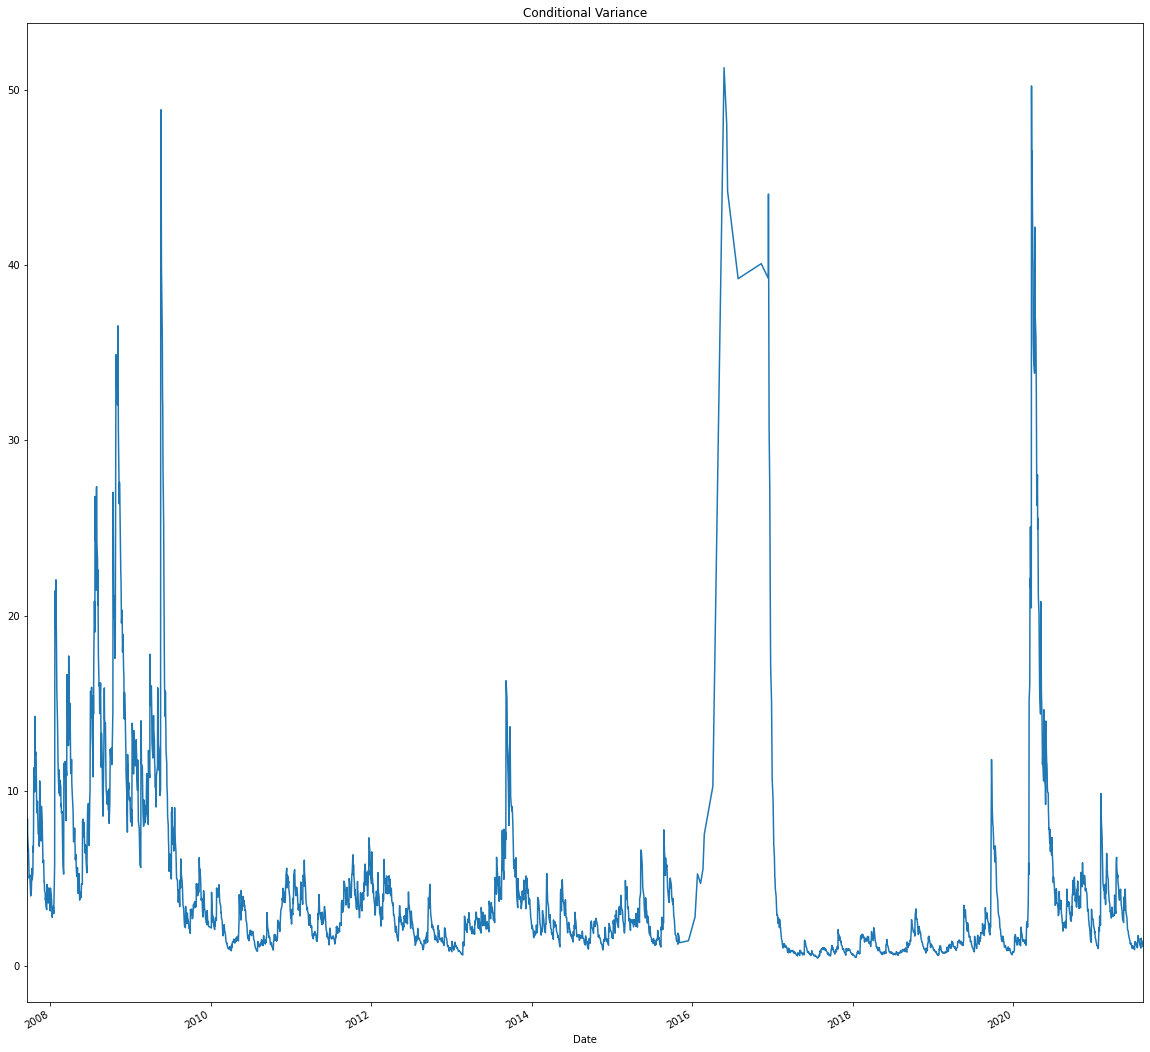

In [217]:
fig, ax = plt.subplots(1, 1)
var_ = res.conditional_volatility ** 2.0
subplot = var_.plot(ax=ax, title="Conditional Variance")
subplot.set_xlim(var_.index[0], var_.index[-1])

This Volatility can be ued for the Hedging Purposes, as we can see currently we are in low volatile zone